<h2>Do Sliding Window and Do 1-50Hz</h2>

In [275]:
import os
import pandas as pd
import numpy as np
from tqdm import tqdm

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from mne.io import concatenate_raws, read_raw_edf
import antropy as ant
import mne
import mne_features
from matplotlib.colors import TwoSlopeNorm

In [276]:
from pycaret.classification import *

<h3>For Healthy Participants</h3>

In [277]:
subject = 'sub-hc24'
if (os.path.exists(f"C:/Users/utkar/Downloads/Parkinson's disease dataset/Healthy/{subject}/{subject}_bands.csv")):
    print('Yes')

Yes


In [409]:
filenames_list = os.listdir("C:/Users/utkar/Downloads/Parkinson's disease dataset/Healthy")
print(filenames_list)

hfd_bands = pd.DataFrame()

hfd_full = pd.DataFrame()
katz_full = pd.DataFrame()
petrosian_full = pd.DataFrame()
spec_ent_full = pd.DataFrame()
perm_ent_full = pd.DataFrame()


for subject in filenames_list:
    
    path_bands = f"C:/Users/utkar/Downloads/Parkinson's disease dataset/Healthy/{subject}/{subject}_off_bands.csv"
    path_full = f"C:/Users/utkar/Downloads/Parkinson's disease dataset/Healthy/{subject}/{subject}_off_full_run3.csv"
    path_full_katz = f"C:/Users/utkar/Downloads/Parkinson's disease dataset/Healthy/{subject}/{subject}_off_full_katz_run3.csv"
    path_full_petrosian = f"C:/Users/utkar/Downloads/Parkinson's disease dataset/Healthy/{subject}/{subject}_off_full_petrosian_run3.csv"
    path_full_spec_ent = f"C:/Users/utkar/Downloads/Parkinson's disease dataset/Healthy/{subject}/{subject}_off_full_spec_ent_run3.csv"
    path_full_perm_ent = f"C:/Users/utkar/Downloads/Parkinson's disease dataset/Healthy/{subject}/{subject}_off_full_perm_ent_run3.csv"
    
    if (os.path.exists(f"C:/Users/utkar/Downloads/Parkinson's disease dataset/Healthy/{subject}/{subject}_off_bands.csv")):
        
        df_bands = pd.read_csv(path_bands)
        
        df_full = pd.read_csv(path_full)
        df_full_katz = pd.read_csv(path_full_katz)
        df_full_petrosian = pd.read_csv(path_full_petrosian)
        df_full_spec_ent = pd.read_csv(path_full_spec_ent)
        df_full_perm_ent = pd.read_csv(path_full_perm_ent)

        hfd_bands = hfd_bands.append(df_bands)
        
        hfd_full = hfd_full.append(df_full)
        katz_full = katz_full.append(df_full_katz)
        petrosian_full = petrosian_full.append(df_full_petrosian)
        spec_ent_full = spec_ent_full.append(df_full_spec_ent)
        perm_ent_full = perm_ent_full.append(df_full_perm_ent)

['sub-hc10', 'sub-hc2', 'sub-hc21', 'sub-hc24', 'sub-hc29', 'sub-hc31', 'sub-hc33', 'sub-hc4', 'sub-hc7', 'sub-hc8']


In [394]:
150*16

2400

In [410]:
spec_ent_full

,Fp1,AF3,F7,F3,FC1,FC5,T7,C3,CP1,CP5,...,C4,T8,FC6,FC2,F4,F8,AF4,Fp2,Fz,Cz
0,0.593160,0.598559,0.563488,0.590472,0.562705,0.562275,0.553198,0.498506,0.429827,0.586307,...,0.577948,0.613808,0.564724,0.367523,0.445660,0.602557,0.556587,0.540283,0.562066,0.541320
1,0.614499,0.606681,0.559590,0.587781,0.564482,0.562040,0.541300,0.480352,0.417072,0.575439,...,0.559370,0.599018,0.559282,0.429124,0.481380,0.587191,0.579491,0.587149,0.556408,0.539914
2,0.607969,0.592293,0.539671,0.550226,0.561478,0.546978,0.518177,0.502615,0.435994,0.577185,...,0.584681,0.586158,0.562747,0.430763,0.492269,0.576242,0.594057,0.583129,0.570698,0.563965
3,0.600888,0.588333,0.546765,0.582698,0.563824,0.569417,0.519913,0.491014,0.407861,0.602747,...,0.549710,0.600058,0.545492,0.481493,0.452987,0.573931,0.585680,0.576294,0.578565,0.569265
4,0.595480,0.605451,0.557263,0.583649,0.557956,0.546623,0.526238,0.519116,0.484884,0.581755,...,0.559930,0.583858,0.562132,0.541830,0.467034,0.576983,0.587835,0.576875,0.564832,0.549550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1491,0.624660,0.607386,0.597077,0.607192,0.529401,0.579056,0.574734,0.565378,0.580323,0.574469,...,0.576829,0.597068,0.623690,0.585522,0.584107,0.611067,0.582352,0.572133,0.538557,0.618774
1492,0.628056,0.596419,0.586965,0.611349,0.543430,0.589126,0.593318,0.540324,0.602338,0.561241,...,0.588189,0.603727,0.615396,0.601627,0.577898,0.601876,0.585890,0.576505,0.497874,0.624481
1493,0.631455,0.601227,0.593298,0.611867,0.572117,0.585208,0.585097,0.562544,0.592729,0.573886,...,0.596449,0.611241,0.622115,0.605023,0.570607,0.587028,0.581258,0.572812,0.559127,0.609075
1494,0.612680,0.610848,0.578186,0.615270,0.553862,0.567754,0.568510,0.587780,0.607136,0.566297,...,0.605174,0.611575,0.617783,0.608265,0.567396,0.573104,0.583822,0.557813,0.544679,0.613117


In [411]:
hfd_full

,Fp1,AF3,F7,F3,FC1,FC5,T7,C3,CP1,CP5,...,C4,T8,FC6,FC2,F4,F8,AF4,Fp2,Fz,Cz
0,1.277653,1.230622,1.191544,1.253399,1.174105,1.177967,1.188061,1.234524,1.235976,1.208692,...,1.159620,1.218181,1.189033,1.177411,1.174001,1.201041,1.238656,1.231797,1.168081,1.204813
1,1.279545,1.222705,1.175083,1.231242,1.169456,1.176096,1.163044,1.212325,1.215707,1.195298,...,1.152388,1.199052,1.174496,1.175125,1.170468,1.185913,1.204947,1.213330,1.170027,1.198491
2,1.259047,1.232002,1.177368,1.227996,1.166653,1.172095,1.162736,1.226836,1.212999,1.204652,...,1.152305,1.187415,1.154519,1.184575,1.175328,1.163633,1.201385,1.208802,1.157404,1.190610
3,1.249836,1.244369,1.188312,1.205672,1.178911,1.186760,1.179052,1.222225,1.213097,1.205049,...,1.144997,1.194475,1.171984,1.188863,1.177631,1.171798,1.211226,1.207849,1.187836,1.180942
4,1.243952,1.231670,1.171361,1.202091,1.169482,1.177114,1.166080,1.214920,1.190018,1.212483,...,1.152667,1.203783,1.180831,1.185571,1.172355,1.168518,1.190080,1.184772,1.181456,1.184720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1491,1.305649,1.358950,1.332233,1.296172,1.243101,1.305509,1.299438,1.296808,1.266680,1.217636,...,1.228653,1.233708,1.290383,1.257369,1.312384,1.289695,1.354137,1.330560,1.250627,1.265760
1492,1.293746,1.348548,1.343281,1.309321,1.244870,1.289598,1.292418,1.301601,1.252909,1.202273,...,1.241700,1.247749,1.288503,1.268681,1.311409,1.271815,1.373986,1.304847,1.274090,1.268720
1493,1.278544,1.339941,1.336418,1.308768,1.232855,1.291857,1.276803,1.296060,1.258590,1.210934,...,1.269670,1.241905,1.299406,1.274981,1.302636,1.259933,1.390972,1.283562,1.286457,1.269742
1494,1.280934,1.358213,1.317821,1.335188,1.224697,1.287468,1.265172,1.301221,1.238646,1.205131,...,1.283067,1.258692,1.306857,1.299638,1.314275,1.272213,1.382583,1.299082,1.278553,1.279901


<h3>For Parkinson's Participants</h3>

In [397]:
filenames_list = os.listdir("C:/Users/utkar/Downloads/Parkinson's disease dataset/PD")
print(filenames_list)

['sub-pd11', 'sub-pd12', 'sub-pd14', 'sub-pd16', 'sub-pd17', 'sub-pd19', 'sub-pd22', 'sub-pd23', 'sub-pd28', 'sub-pd3', 'sub-pd5', 'sub-pd9']


In [412]:
filenames_list = os.listdir("C:/Users/utkar/Downloads/Parkinson's disease dataset/PD")
print(filenames_list)

hfd_bands_pd = pd.DataFrame()

hfd_full_pd = pd.DataFrame()
katz_full_pd = pd.DataFrame()
petrosian_full_pd = pd.DataFrame()
spec_ent_full_pd = pd.DataFrame()
perm_ent_full_pd = pd.DataFrame()


for subject in filenames_list:
    path_bands = f"C:/Users/utkar/Downloads/Parkinson's disease dataset/PD/{subject}/{subject}_on_bands.csv"
    path_full = f"C:/Users/utkar/Downloads/Parkinson's disease dataset/PD/{subject}/{subject}_on_full_run3.csv"
    
    path_full_katz = f"C:/Users/utkar/Downloads/Parkinson's disease dataset/PD/{subject}/{subject}_on_full_katz_run3.csv"
    path_full_petrosian = f"C:/Users/utkar/Downloads/Parkinson's disease dataset/PD/{subject}/{subject}_on_full_petrosian_run3.csv"
    path_full_spec_ent = f"C:/Users/utkar/Downloads/Parkinson's disease dataset/PD/{subject}/{subject}_on_full_spec_ent_run3.csv"
    path_full_perm_ent = f"C:/Users/utkar/Downloads/Parkinson's disease dataset/PD/{subject}/{subject}_on_full_perm_ent_run3.csv"
    
    if (os.path.exists(f"C:/Users/utkar/Downloads/Parkinson's disease dataset/PD/{subject}/{subject}_on_bands.csv")):
        
        df_bands = pd.read_csv(path_bands)
        
        df_full = pd.read_csv(path_full)
        df_full_katz = pd.read_csv(path_full_katz)
        df_full_petrosian = pd.read_csv(path_full_petrosian)
        df_full_spec_ent = pd.read_csv(path_full_spec_ent)
        df_full_perm_ent = pd.read_csv(path_full_perm_ent)

        hfd_bands_pd = hfd_bands_pd.append(df_bands)
        
        hfd_full_pd = hfd_full_pd.append(df_full)
        katz_full_pd = katz_full_pd.append(df_full_katz)
        petrosian_full_pd = petrosian_full_pd.append(df_full_petrosian)
        spec_ent_full_pd = spec_ent_full_pd.append(df_full_spec_ent)
        perm_ent_full_pd = perm_ent_full_pd.append(df_full_perm_ent)

['sub-pd11', 'sub-pd12', 'sub-pd14', 'sub-pd16', 'sub-pd17', 'sub-pd19', 'sub-pd22', 'sub-pd23', 'sub-pd28', 'sub-pd3', 'sub-pd5', 'sub-pd9']


In [399]:
150*17

2550

In [413]:
spec_ent_full_pd

,Fp1,AF3,F7,F3,FC1,FC5,T7,C3,CP1,CP5,...,C4,T8,FC6,FC2,F4,F8,AF4,Fp2,Fz,Cz
0,0.546736,0.556076,0.473120,0.557950,0.532212,0.569210,0.556794,0.548265,0.538362,0.539079,...,0.526478,0.575533,0.571447,0.499096,0.522316,0.549910,0.542013,0.544895,0.540928,0.527064
1,0.542936,0.540021,0.496940,0.547173,0.536538,0.571207,0.576048,0.563988,0.530970,0.532828,...,0.515200,0.568225,0.548850,0.480482,0.516112,0.524903,0.503641,0.512518,0.511717,0.524240
2,0.545533,0.528515,0.487701,0.536233,0.528095,0.568786,0.584933,0.568235,0.526790,0.523320,...,0.535656,0.555641,0.545403,0.537644,0.540471,0.535599,0.520626,0.518545,0.526507,0.520397
3,0.523015,0.519258,0.476464,0.541878,0.519999,0.559024,0.589143,0.540424,0.531925,0.523415,...,0.531404,0.518786,0.536662,0.508507,0.532625,0.521634,0.519234,0.517086,0.500160,0.518426
4,0.521943,0.519487,0.503544,0.528250,0.518282,0.558087,0.557726,0.551466,0.524381,0.518716,...,0.502284,0.474148,0.492474,0.524054,0.507799,0.502865,0.499851,0.503504,0.516805,0.518971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1491,0.517841,0.510925,0.436847,0.526297,0.505866,0.447186,0.480725,0.557299,0.545918,0.507133,...,0.540145,0.484904,0.531515,0.490141,0.521785,0.492363,0.493306,0.515453,0.525555,0.514605
1492,0.505686,0.479389,0.479226,0.513151,0.537017,0.469743,0.506694,0.549038,0.533137,0.496452,...,0.542489,0.463200,0.510285,0.498320,0.501529,0.443065,0.481113,0.501123,0.478762,0.530072
1493,0.518001,0.507293,0.472816,0.548345,0.529189,0.454833,0.509023,0.529810,0.554771,0.490869,...,0.495799,0.507521,0.543787,0.503191,0.529465,0.478699,0.500297,0.519402,0.525443,0.531926
1494,0.492463,0.508322,0.447000,0.527992,0.540703,0.439222,0.479878,0.505936,0.554732,0.472310,...,0.502921,0.466064,0.518149,0.522514,0.527221,0.443895,0.476518,0.496723,0.510932,0.538645


In [414]:
hfd_full_pd

,Fp1,AF3,F7,F3,FC1,FC5,T7,C3,CP1,CP5,...,C4,T8,FC6,FC2,F4,F8,AF4,Fp2,Fz,Cz
0,1.157822,1.151306,1.118235,1.160752,1.179193,1.201934,1.246479,1.170408,1.112922,1.128120,...,1.122411,1.150914,1.136262,1.157736,1.160811,1.191306,1.169726,1.150618,1.172943,1.166072
1,1.154922,1.140010,1.125229,1.149271,1.153187,1.240493,1.266133,1.171172,1.121799,1.144997,...,1.125908,1.181667,1.172070,1.150032,1.184387,1.217108,1.193179,1.172507,1.139338,1.141703
2,1.159399,1.168332,1.138357,1.174843,1.145055,1.243274,1.260725,1.168196,1.123770,1.118560,...,1.131303,1.165689,1.144187,1.146831,1.147810,1.177429,1.174793,1.170414,1.131740,1.138443
3,1.167894,1.177442,1.144920,1.182447,1.150938,1.232805,1.252901,1.172902,1.136669,1.114404,...,1.110412,1.141355,1.124614,1.127153,1.147154,1.159434,1.166046,1.166267,1.134204,1.128490
4,1.163173,1.171058,1.132177,1.168243,1.138585,1.222243,1.239360,1.173391,1.128526,1.106605,...,1.108696,1.137379,1.126470,1.127836,1.142429,1.166243,1.166152,1.162083,1.135125,1.114942
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1491,1.200965,1.225844,1.174513,1.199989,1.198926,1.176072,1.140334,1.164080,1.174021,1.139453,...,1.167014,1.187610,1.182492,1.154603,1.191084,1.168927,1.175841,1.213989,1.172238,1.141639
1492,1.196979,1.214834,1.179184,1.186041,1.187340,1.169608,1.152985,1.167549,1.164736,1.141969,...,1.146339,1.162036,1.170692,1.129067,1.180556,1.139439,1.158215,1.196043,1.182660,1.132470
1493,1.180118,1.217567,1.182152,1.175660,1.169270,1.177025,1.159867,1.175815,1.154994,1.157359,...,1.130338,1.160756,1.177592,1.140549,1.198527,1.144361,1.162136,1.194757,1.204402,1.139156
1494,1.174474,1.213504,1.179020,1.164473,1.160531,1.173349,1.155086,1.177453,1.154049,1.126693,...,1.129410,1.155425,1.179022,1.138149,1.197641,1.134826,1.145975,1.184582,1.200017,1.143122


In [515]:
hfd_bands_pd['Y'] = 1
hfd_full_pd['Y'] = 1

hfd_bands['Y'] = 0
hfd_full['Y'] = 0

<h1>For Full</h1>
<h2>1. Higuchi</h2>

In [516]:
X1 = hfd_full.append(hfd_full_pd).reset_index().drop('index', axis=1)
X = X1.iloc[:,:-1]
X

,Fp1,AF3,F7,F3,FC1,FC5,T7,C3,CP1,CP5,...,C4,T8,FC6,FC2,F4,F8,AF4,Fp2,Fz,Cz
0,1.277653,1.230622,1.191544,1.253399,1.174105,1.177967,1.188061,1.234524,1.235976,1.208692,...,1.159620,1.218181,1.189033,1.177411,1.174001,1.201041,1.238656,1.231797,1.168081,1.204813
1,1.279545,1.222705,1.175083,1.231242,1.169456,1.176096,1.163044,1.212325,1.215707,1.195298,...,1.152388,1.199052,1.174496,1.175125,1.170468,1.185913,1.204947,1.213330,1.170027,1.198491
2,1.259047,1.232002,1.177368,1.227996,1.166653,1.172095,1.162736,1.226836,1.212999,1.204652,...,1.152305,1.187415,1.154519,1.184575,1.175328,1.163633,1.201385,1.208802,1.157404,1.190610
3,1.249836,1.244369,1.188312,1.205672,1.178911,1.186760,1.179052,1.222225,1.213097,1.205049,...,1.144997,1.194475,1.171984,1.188863,1.177631,1.171798,1.211226,1.207849,1.187836,1.180942
4,1.243952,1.231670,1.171361,1.202091,1.169482,1.177114,1.166080,1.214920,1.190018,1.212483,...,1.152667,1.203783,1.180831,1.185571,1.172355,1.168518,1.190080,1.184772,1.181456,1.184720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32907,1.200965,1.225844,1.174513,1.199989,1.198926,1.176072,1.140334,1.164080,1.174021,1.139453,...,1.167014,1.187610,1.182492,1.154603,1.191084,1.168927,1.175841,1.213989,1.172238,1.141639
32908,1.196979,1.214834,1.179184,1.186041,1.187340,1.169608,1.152985,1.167549,1.164736,1.141969,...,1.146339,1.162036,1.170692,1.129067,1.180556,1.139439,1.158215,1.196043,1.182660,1.132470
32909,1.180118,1.217567,1.182152,1.175660,1.169270,1.177025,1.159867,1.175815,1.154994,1.157359,...,1.130338,1.160756,1.177592,1.140549,1.198527,1.144361,1.162136,1.194757,1.204402,1.139156
32910,1.174474,1.213504,1.179020,1.164473,1.160531,1.173349,1.155086,1.177453,1.154049,1.126693,...,1.129410,1.155425,1.179022,1.138149,1.197641,1.134826,1.145975,1.184582,1.200017,1.143122


<h2>Using Pycaret</h2>

In [417]:
X1

,Fp1,AF3,F7,F3,FC1,FC5,T7,C3,CP1,CP5,...,T8,FC6,FC2,F4,F8,AF4,Fp2,Fz,Cz,Y
0,1.277653,1.230622,1.191544,1.253399,1.174105,1.177967,1.188061,1.234524,1.235976,1.208692,...,1.218181,1.189033,1.177411,1.174001,1.201041,1.238656,1.231797,1.168081,1.204813,0
1,1.279545,1.222705,1.175083,1.231242,1.169456,1.176096,1.163044,1.212325,1.215707,1.195298,...,1.199052,1.174496,1.175125,1.170468,1.185913,1.204947,1.213330,1.170027,1.198491,0
2,1.259047,1.232002,1.177368,1.227996,1.166653,1.172095,1.162736,1.226836,1.212999,1.204652,...,1.187415,1.154519,1.184575,1.175328,1.163633,1.201385,1.208802,1.157404,1.190610,0
3,1.249836,1.244369,1.188312,1.205672,1.178911,1.186760,1.179052,1.222225,1.213097,1.205049,...,1.194475,1.171984,1.188863,1.177631,1.171798,1.211226,1.207849,1.187836,1.180942,0
4,1.243952,1.231670,1.171361,1.202091,1.169482,1.177114,1.166080,1.214920,1.190018,1.212483,...,1.203783,1.180831,1.185571,1.172355,1.168518,1.190080,1.184772,1.181456,1.184720,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32907,1.200965,1.225844,1.174513,1.199989,1.198926,1.176072,1.140334,1.164080,1.174021,1.139453,...,1.187610,1.182492,1.154603,1.191084,1.168927,1.175841,1.213989,1.172238,1.141639,1
32908,1.196979,1.214834,1.179184,1.186041,1.187340,1.169608,1.152985,1.167549,1.164736,1.141969,...,1.162036,1.170692,1.129067,1.180556,1.139439,1.158215,1.196043,1.182660,1.132470,1
32909,1.180118,1.217567,1.182152,1.175660,1.169270,1.177025,1.159867,1.175815,1.154994,1.157359,...,1.160756,1.177592,1.140549,1.198527,1.144361,1.162136,1.194757,1.204402,1.139156,1
32910,1.174474,1.213504,1.179020,1.164473,1.160531,1.173349,1.155086,1.177453,1.154049,1.126693,...,1.155425,1.179022,1.138149,1.197641,1.134826,1.145975,1.184582,1.200017,1.143122,1


In [418]:
X2 = X1[['F3','Fz','F4','FC1','FC2','C3','C4','Cz','CP1','CP2','CP5','CP6','P3','P4','Pz','Y']]

In [419]:
X2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32912 entries, 0 to 32911
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   F3      32912 non-null  float64
 1   Fz      32912 non-null  float64
 2   F4      32912 non-null  float64
 3   FC1     32912 non-null  float64
 4   FC2     32912 non-null  float64
 5   C3      32912 non-null  float64
 6   C4      32912 non-null  float64
 7   Cz      32912 non-null  float64
 8   CP1     32912 non-null  float64
 9   CP2     32912 non-null  float64
 10  CP5     32912 non-null  float64
 11  CP6     32912 non-null  float64
 12  P3      32912 non-null  float64
 13  P4      32912 non-null  float64
 14  Pz      32912 non-null  float64
 15  Y       32912 non-null  int64  
dtypes: float64(15), int64(1)
memory usage: 4.0 MB


In [420]:
clf = setup(data=X1, target='Y', feature_selection=True, feature_selection_threshold=0.9)

,Description,Value
0,session_id,8671
1,Target,Y
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(32912, 33)"
5,Missing Values,False
6,Numeric Features,32
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


<h2>RUN2 with Sliding Window</h2>

In [421]:
compare_models(fold=15)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.9958,0.9996,0.9971,0.9952,0.9961,0.9915,0.9915,0.4760
et,Extra Trees Classifier,0.9886,0.9990,0.9896,0.9895,0.9896,0.9771,0.9771,0.3720
xgboost,Extreme Gradient Boosting,0.9855,0.9987,0.9865,0.9869,0.9867,0.9709,0.9709,1.5607
rf,Random Forest Classifier,0.9799,0.9977,0.9807,0.9825,0.9816,0.9596,0.9596,0.8073
lightgbm,Light Gradient Boosting Machine,0.9764,0.9972,0.9783,0.9784,0.9783,0.9524,0.9524,0.1507
qda,Quadratic Discriminant Analysis,0.9502,0.9904,0.9556,0.9532,0.9544,0.8996,0.8996,0.0320
gbc,Gradient Boosting Classifier,0.9253,0.9791,0.9408,0.9236,0.9321,0.8491,0.8493,1.7960
dt,Decision Tree Classifier,0.9084,0.9077,0.9153,0.9166,0.9159,0.8153,0.8154,0.0947
lda,Linear Discriminant Analysis,0.8547,0.9296,0.8900,0.8504,0.8697,0.7056,0.7066,0.0440
ridge,Ridge Classifier,0.8520,0.0000,0.8892,0.8471,0.8675,0.7000,0.7012,0.0140


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

<h2>KNN gives 99.58% acc with 90% overlap and k=5</h2>

In [293]:
compare_models(fold=15)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.9642,0.9914,0.9790,0.9567,0.9677,0.9275,0.9279,0.1760
xgboost,Extreme Gradient Boosting,0.9526,0.9901,0.9608,0.9535,0.9570,0.9043,0.9047,0.2980
lightgbm,Light Gradient Boosting Machine,0.9481,0.9899,0.9588,0.9475,0.9529,0.8951,0.8956,0.0607
et,Extra Trees Classifier,0.9470,0.9877,0.9532,0.9505,0.9517,0.8930,0.8934,0.0747
qda,Quadratic Discriminant Analysis,0.9418,0.9870,0.9520,0.9425,0.9471,0.8824,0.8827,0.0053
rf,Random Forest Classifier,0.9394,0.9825,0.9469,0.9431,0.9448,0.8776,0.8781,0.1387
gbc,Gradient Boosting Classifier,0.9073,0.9692,0.9255,0.9075,0.9162,0.8124,0.8130,0.2933
lda,Linear Discriminant Analysis,0.8288,0.9088,0.8763,0.8236,0.8488,0.6521,0.6547,0.0053
dt,Decision Tree Classifier,0.8223,0.8209,0.8362,0.8388,0.8373,0.6416,0.6421,0.0133
ada,Ada Boost Classifier,0.8215,0.9066,0.8517,0.8284,0.8394,0.6384,0.6398,0.0707


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

In [422]:
knn = create_model('knn', n_neighbors=4, fold=15)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9980,0.9988,0.9964,1.0000,0.9982,0.9961,0.9961
1,0.9967,0.9985,0.9988,0.9952,0.9970,0.9934,0.9934
2,0.9980,1.0000,0.9976,0.9988,0.9982,0.9961,0.9961
3,0.9967,1.0000,0.9964,0.9976,0.9970,0.9934,0.9934
4,0.9935,0.9999,0.9904,0.9976,0.9940,0.9869,0.9869
5,0.9941,0.9986,0.9940,0.9952,0.9946,0.9882,0.9882
6,0.9967,0.9994,0.9952,0.9988,0.9970,0.9934,0.9934
7,0.9967,1.0000,0.9952,0.9988,0.9970,0.9934,0.9934
8,0.9980,0.9993,0.9976,0.9988,0.9982,0.9961,0.9961


<h2>KNN gives 99.65% with k=4</h2>

In [424]:
xgb=create_model('xgboost', fold=15)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9818,0.9976,0.9845,0.9821,0.9833,0.9632,0.9632
1,0.9811,0.9988,0.9869,0.9787,0.9828,0.9619,0.9619
2,0.9870,0.9989,0.9845,0.9916,0.9880,0.9738,0.9738
3,0.9811,0.9989,0.9761,0.9891,0.9826,0.9620,0.9621
4,0.9837,0.9988,0.9845,0.9856,0.9851,0.9672,0.9672
5,0.9863,0.9969,0.9857,0.9892,0.9874,0.9724,0.9725
6,0.9928,0.9990,0.9940,0.9928,0.9934,0.9856,0.9856
7,0.9883,0.9990,0.9904,0.9881,0.9893,0.9764,0.9764
8,0.9850,0.9983,0.9845,0.9880,0.9862,0.9698,0.9698


<h2>XGBoost gives 98.55%</h2>

In [227]:
knn = create_model('knn', n_neighbors = 4, fold=15)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9226,0.9559,0.9036,0.9375,0.9202,0.8452,0.8457
1,0.9405,0.9794,0.9518,0.9294,0.9405,0.8810,0.8812
2,0.9405,0.9828,0.9518,0.9294,0.9405,0.8810,0.8812
3,0.9524,0.9802,0.9398,0.9630,0.9512,0.9047,0.9050
4,0.9286,0.9709,0.9405,0.9186,0.9294,0.8571,0.8574
5,0.9524,0.9729,0.9524,0.9524,0.9524,0.9048,0.9048
6,0.9226,0.9562,0.9286,0.9176,0.9231,0.8452,0.8453
7,0.9643,0.9831,0.9762,0.9535,0.9647,0.9286,0.9288
8,0.9464,0.9910,0.9167,0.9747,0.9448,0.8929,0.8944


<h2>KNN - 94.08%</h2>

knn gives 92.17% accuracy, qda gives 91.85

In [21]:
!pip install xgboost

  Using cached xgboost-1.6.1-py3-none-win_amd64.whl (125.4 MB)


In [517]:
import xgboost as xgb
from xgboost import XGBClassifier

In [518]:
X3 = X1.iloc[:,1:]
X = X3.iloc[:,:-1]
Y = X3['Y']

In [519]:
X

,AF3,F7,F3,FC1,FC5,T7,C3,CP1,CP5,P7,...,C4,T8,FC6,FC2,F4,F8,AF4,Fp2,Fz,Cz
0,1.230622,1.191544,1.253399,1.174105,1.177967,1.188061,1.234524,1.235976,1.208692,1.201646,...,1.159620,1.218181,1.189033,1.177411,1.174001,1.201041,1.238656,1.231797,1.168081,1.204813
1,1.222705,1.175083,1.231242,1.169456,1.176096,1.163044,1.212325,1.215707,1.195298,1.197292,...,1.152388,1.199052,1.174496,1.175125,1.170468,1.185913,1.204947,1.213330,1.170027,1.198491
2,1.232002,1.177368,1.227996,1.166653,1.172095,1.162736,1.226836,1.212999,1.204652,1.202823,...,1.152305,1.187415,1.154519,1.184575,1.175328,1.163633,1.201385,1.208802,1.157404,1.190610
3,1.244369,1.188312,1.205672,1.178911,1.186760,1.179052,1.222225,1.213097,1.205049,1.209099,...,1.144997,1.194475,1.171984,1.188863,1.177631,1.171798,1.211226,1.207849,1.187836,1.180942
4,1.231670,1.171361,1.202091,1.169482,1.177114,1.166080,1.214920,1.190018,1.212483,1.215623,...,1.152667,1.203783,1.180831,1.185571,1.172355,1.168518,1.190080,1.184772,1.181456,1.184720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32907,1.225844,1.174513,1.199989,1.198926,1.176072,1.140334,1.164080,1.174021,1.139453,1.176411,...,1.167014,1.187610,1.182492,1.154603,1.191084,1.168927,1.175841,1.213989,1.172238,1.141639
32908,1.214834,1.179184,1.186041,1.187340,1.169608,1.152985,1.167549,1.164736,1.141969,1.175846,...,1.146339,1.162036,1.170692,1.129067,1.180556,1.139439,1.158215,1.196043,1.182660,1.132470
32909,1.217567,1.182152,1.175660,1.169270,1.177025,1.159867,1.175815,1.154994,1.157359,1.187944,...,1.130338,1.160756,1.177592,1.140549,1.198527,1.144361,1.162136,1.194757,1.204402,1.139156
32910,1.213504,1.179020,1.164473,1.160531,1.173349,1.155086,1.177453,1.154049,1.126693,1.176401,...,1.129410,1.155425,1.179022,1.138149,1.197641,1.134826,1.145975,1.184582,1.200017,1.143122


In [521]:
Y = X3['Y']
Y

0        0
1        0
2        0
3        0
4        0
        ..
32907    1
32908    1
32909    1
32910    1
32911    1
Name: Y, Length: 32912, dtype: int64

In [522]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33, random_state = 123)

In [523]:
y_train

19400    1
21940    1
9596     0
23981    1
10523    0
        ..
7763     0
15377    1
17730    1
28030    1
15725    1
Name: Y, Length: 22051, dtype: int64

In [524]:
X_train

,AF3,F7,F3,FC1,FC5,T7,C3,CP1,CP5,P7,...,C4,T8,FC6,FC2,F4,F8,AF4,Fp2,Fz,Cz
19400,1.270549,1.299936,1.271511,1.197213,1.337241,1.328603,1.246509,1.138341,1.231269,1.270802,...,1.235070,1.254047,1.280580,1.265399,1.252889,1.248354,1.318500,1.267019,1.221282,1.226466
21940,1.260594,1.319019,1.286533,1.199511,1.272906,1.277531,1.225284,1.185678,1.290614,1.220321,...,1.312596,1.352315,1.355319,1.235853,1.282243,1.281508,1.352508,1.344972,1.227483,1.249728
9596,1.281144,1.327719,1.286107,1.195910,1.345969,1.393286,1.314994,1.185980,1.301283,1.263277,...,1.333202,1.313260,1.306226,1.288434,1.240621,1.272271,1.242026,1.263254,1.221347,1.263600
23981,1.235675,1.201818,1.190251,1.192765,1.186327,1.205019,1.187144,1.181542,1.192569,1.235148,...,1.180453,1.281620,1.218524,1.160265,1.216327,1.198338,1.227437,1.247870,1.192535,1.151556
10523,1.281404,1.291401,1.319984,1.227505,1.245623,1.274250,1.220488,1.207085,1.168676,1.156224,...,1.218395,1.265068,1.281452,1.231284,1.289651,1.256381,1.301391,1.216564,1.226966,1.199104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7763,1.184599,1.156157,1.173653,1.177472,1.201348,1.216282,1.202350,1.176346,1.192791,1.204361,...,1.191587,1.242239,1.189586,1.127115,1.182064,1.226843,1.219118,1.147814,1.137032,1.172183
15377,1.141059,1.121962,1.119234,1.115360,1.145855,1.173357,1.119842,1.096338,1.088881,1.082775,...,1.118110,1.145023,1.104684,1.127240,1.098831,1.132116,1.123623,1.113769,1.102719,1.126991
17730,1.192641,1.208514,1.142666,1.143470,1.137778,1.135335,1.135861,1.142005,1.136218,1.225646,...,1.100537,1.164124,1.154713,1.126052,1.161669,1.195915,1.281879,1.169994,1.137611,1.176422
28030,1.166493,1.139932,1.167863,1.157699,1.152919,1.143491,1.168446,1.138749,1.152639,1.148303,...,1.139710,1.183760,1.175389,1.151787,1.173923,1.208498,1.185102,1.161548,1.133932,1.145435


<h3>XGBoost</h3>

In [525]:
model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 98.06%


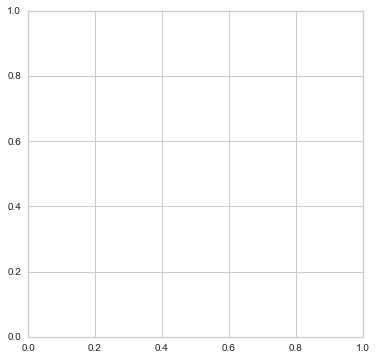

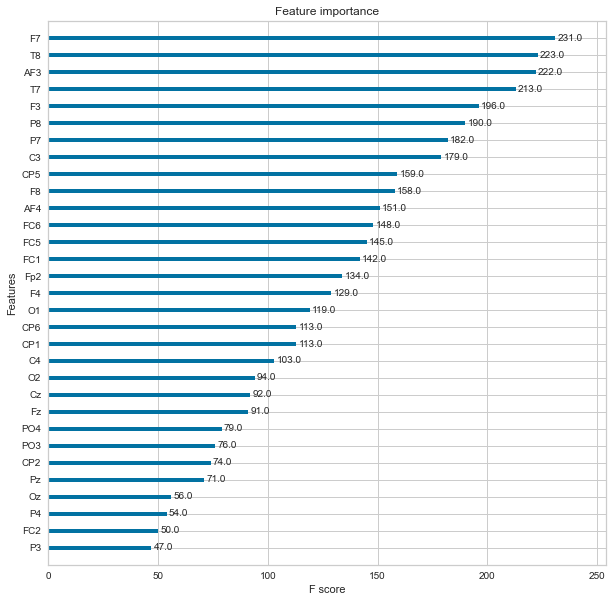

In [526]:
# plot feature importance
from xgboost import plot_importance
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(6,6))

plt.rcParams["figure.figsize"] = (10,10)
plot_importance(model)
plt.show()

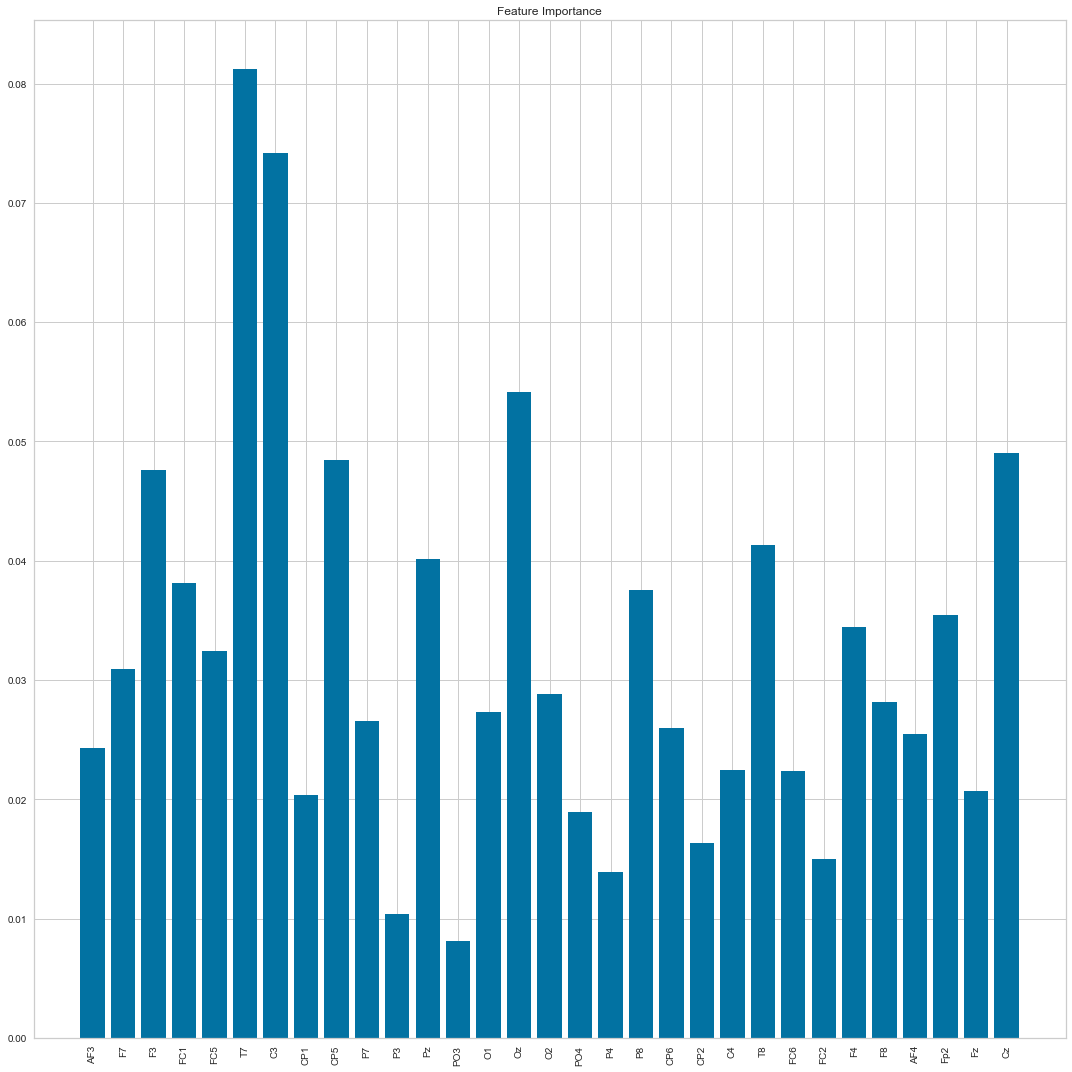

In [527]:
importances = model.feature_importances_
sorted_indices = np.argsort(importances)[::-1]

fig, ax = plt.subplots(figsize=(15,15))
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances, align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns, rotation=90)
plt.tight_layout()
plt.show()

<h3>Random Forest</h3>

In [272]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))
#Random Forest Classifier gives 79.5 percent accuracy for HFD, which is highest

0.9023569023569024


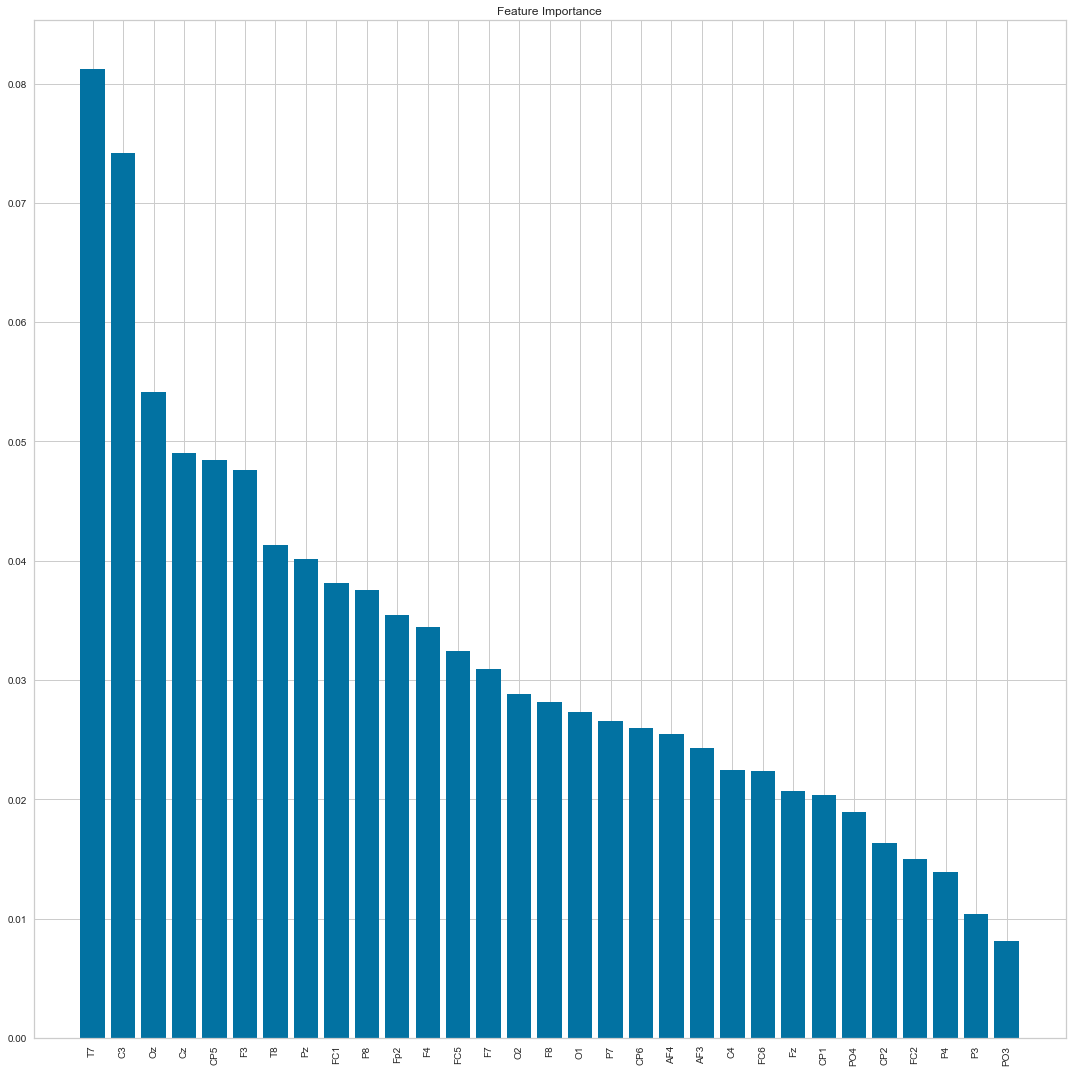

In [528]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,15))

importances = model.feature_importances_
#
# Sort the feature importance in descending order
#
sorted_indices = np.argsort(importances)[::-1]
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

<h2>KNN Classifier</h2>

In [435]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9947518644692017


<h2>n=6 -> 92.22%</h2>

In [529]:
subject = "sub-hc33"
path = f"C:/Users/utkar/Downloads/Parkinson's disease dataset/Healthy/{subject}/"
filename = f"ses-hc/eeg/{subject}_ses-hc_task-rest_eeg.bdf"

EEG_data = mne.io.read_raw_bdf(f"{path}{filename}", preload=True)
low_freq, high_freq = 1.0, 40.0 # values in Hz
raw = EEG_data.copy().filter(low_freq, high_freq, n_jobs=4)
raw.crop(tmax=150)
raw = raw.drop_channels(['EXG1', 'EXG2', 'EXG3', 'EXG4', 'EXG5', 'EXG6', 'EXG7', 'EXG8', 'Status'])
std_montage = mne.channels.make_standard_montage('standard_1005')
raw.set_montage(std_montage)

Extracting EDF parameters from C:\Users\utkar\Downloads\Parkinson's disease dataset\Healthy\sub-hc33\ses-hc\eeg\sub-hc33_ses-hc_task-rest_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 97279  =      0.000 ...   189.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1691 samples (3.303 sec)



[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  14 tasks      | elapsed:    1.8s
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:    1.9s finished


<RawEDF | sub-hc33_ses-hc_task-rest_eeg.bdf, 32 x 76801 (150.0 s), ~18.8 MB, data loaded>

In [530]:
raw.ch_names

['Fp1',
 'AF3',
 'F7',
 'F3',
 'FC1',
 'FC5',
 'T7',
 'C3',
 'CP1',
 'CP5',
 'P7',
 'P3',
 'Pz',
 'PO3',
 'O1',
 'Oz',
 'O2',
 'PO4',
 'P4',
 'P8',
 'CP6',
 'CP2',
 'C4',
 'T8',
 'FC6',
 'FC2',
 'F4',
 'F8',
 'AF4',
 'Fp2',
 'Fz',
 'Cz']

In [532]:
importances1 = []
importances1.append(0)
for imp in importances:
    importances1.append(imp)
importances1 = np.array(importances1)
importances1

array([0.        , 0.02428505, 0.03094529, 0.04758779, 0.03814594,
       0.03246271, 0.08122856, 0.07417182, 0.02033527, 0.0484646 ,
       0.02652773, 0.010375  , 0.04016645, 0.00808853, 0.02728432,
       0.05412917, 0.02878128, 0.01890844, 0.01389761, 0.03754991,
       0.02597497, 0.01636967, 0.02244444, 0.04127285, 0.02239357,
       0.01499154, 0.03441986, 0.02818052, 0.02546775, 0.03544772,
       0.02068586, 0.04901586])

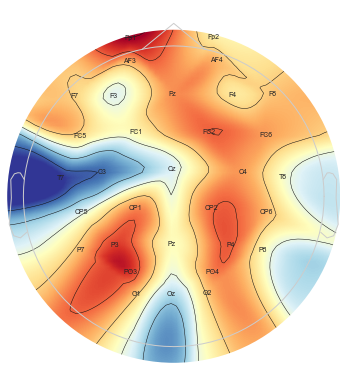

(<matplotlib.image.AxesImage at 0x27b5c1c50a0>,
 <matplotlib.contour.QuadContourSet at 0x27b5dbd6e50>)

In [533]:
fig, ax = plt.subplots(figsize=(6,6))
cnorm = TwoSlopeNorm(vmin=0, vcenter=(0 + max(importances1))/2, vmax=max(importances1))
mne.viz.plot_topomap(data=importances1, pos=raw.info, names=raw.ch_names, show_names=True, cnorm=cnorm, cmap='RdYlBu')

<h2>2. Katz</h2>

In [534]:
katz_full_pd['Y'] = 1
katz_full['Y'] = 0

In [535]:
X1 = katz_full.append(katz_full_pd).reset_index().drop('index', axis=1)
X = X1.iloc[:,:-1]
X1

,Fp1,AF3,F7,F3,FC1,FC5,T7,C3,CP1,CP5,...,T8,FC6,FC2,F4,F8,AF4,Fp2,Fz,Cz,Y
0,2.240762,2.263376,2.033038,2.100344,1.903471,1.992404,1.867080,1.784015,1.965826,2.154616,...,2.267303,2.066006,1.801091,1.949983,2.005152,2.160872,1.949350,1.984313,1.832992,0
1,2.217511,1.950003,1.798926,1.851931,1.907389,1.756488,1.819770,1.927174,1.781233,2.138368,...,2.293019,2.181844,1.808113,1.841948,2.033404,2.036874,2.047425,1.802082,1.860138,0
2,1.935089,2.066348,1.801097,2.154197,1.939602,1.921714,1.755082,1.651378,1.853654,2.082584,...,2.264286,1.976013,1.784139,1.799290,2.009511,2.201388,2.106172,1.951174,1.781855,0
3,1.995225,2.127213,1.770077,2.105764,1.743808,1.809252,1.767886,1.580463,1.726023,1.914036,...,2.091119,1.872597,1.604103,1.730366,2.036608,2.200249,2.040446,1.920012,1.972516,0
4,1.933963,1.852595,1.724684,1.893133,2.054675,1.780166,1.738888,1.679361,1.761892,2.037707,...,2.102485,1.809543,1.616440,1.723071,1.983639,1.974990,1.747153,1.836451,2.063110,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32907,1.668459,1.752132,1.641033,1.803973,1.930029,1.695551,1.724115,1.997884,1.979666,1.822778,...,1.617934,1.966997,1.784278,1.721821,1.615179,1.717106,1.705518,1.870770,1.807552,1
32908,1.857554,1.861727,1.722139,2.022855,2.107527,1.606133,1.845936,1.882331,2.076927,1.727345,...,1.844492,1.943573,1.752417,2.092003,1.669915,1.981080,1.930092,1.883825,1.750208,1
32909,1.939384,1.893126,1.798140,1.939129,1.939283,1.678670,1.857336,1.955608,2.112717,1.731924,...,1.774110,1.865578,1.853107,1.996506,1.816835,1.991066,1.951380,1.882865,1.976827,1
32910,1.954664,1.844000,1.995998,1.878180,1.850496,1.767431,1.897730,1.877724,1.882951,1.969703,...,1.805304,1.720400,1.911287,1.841168,1.753352,1.768096,1.919698,1.764841,2.061869,1


<h2>Pycaret</h2>

In [441]:
clf = setup(data=X1, target='Y')

,Description,Value
0,session_id,6797
1,Target,Y
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(32912, 33)"
5,Missing Values,False
6,Numeric Features,32
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [442]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.8478,0.9236,0.8866,0.8442,0.8649,0.6910,0.6921,1.7860
lightgbm,Light Gradient Boosting Machine,0.8401,0.9176,0.8860,0.8336,0.8589,0.6749,0.6767,0.1310
rf,Random Forest Classifier,0.8325,0.9086,0.8725,0.8311,0.8513,0.6599,0.6610,0.9220
et,Extra Trees Classifier,0.8321,0.9120,0.8954,0.8166,0.8541,0.6572,0.6612,0.4160
knn,K Neighbors Classifier,0.8311,0.9047,0.9511,0.7862,0.8608,0.6508,0.6701,1.3490
qda,Quadratic Discriminant Analysis,0.8246,0.9044,0.8664,0.8235,0.8444,0.6436,0.6448,0.0350
gbc,Gradient Boosting Classifier,0.7883,0.8685,0.8675,0.7744,0.8183,0.5669,0.5722,2.3090
ada,Ada Boost Classifier,0.7317,0.8028,0.8132,0.7295,0.7690,0.4513,0.4551,0.4860
lda,Linear Discriminant Analysis,0.7309,0.7989,0.7952,0.7361,0.7645,0.4517,0.4536,0.0460
ridge,Ridge Classifier,0.7307,0.0000,0.7955,0.7358,0.7644,0.4514,0.4533,0.0190


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=-1, num_parallel_tree=1, objective='binary:logistic',
              predictor='auto', random_state=6797, reg_alpha=0, ...)

In [443]:
compare_models(fold=15)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.8463,0.9242,0.8869,0.8419,0.8638,0.6878,0.6892,1.6080
lightgbm,Light Gradient Boosting Machine,0.8389,0.9180,0.8853,0.8323,0.8579,0.6724,0.6742,0.1473
rf,Random Forest Classifier,0.8342,0.9094,0.8755,0.8317,0.8529,0.6633,0.6646,0.9613
et,Extra Trees Classifier,0.8339,0.9136,0.8949,0.8195,0.8555,0.6611,0.6647,0.4267
knn,K Neighbors Classifier,0.8299,0.9053,0.9504,0.7852,0.8600,0.6484,0.6679,0.7167
qda,Quadratic Discriminant Analysis,0.8249,0.9045,0.8668,0.8238,0.8447,0.6444,0.6456,0.0313
gbc,Gradient Boosting Classifier,0.7886,0.8688,0.8670,0.7750,0.8183,0.5674,0.5727,1.8427
ridge,Ridge Classifier,0.7313,0.0000,0.7964,0.7361,0.7650,0.4524,0.4544,0.0133
lda,Linear Discriminant Analysis,0.7313,0.7989,0.7960,0.7363,0.7649,0.4525,0.4545,0.0447
lr,Logistic Regression,0.7303,0.7989,0.7903,0.7375,0.7630,0.4509,0.4525,0.1080


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=-1, num_parallel_tree=1, objective='binary:logistic',
              predictor='auto', random_state=6797, reg_alpha=0, ...)

<b>QDA - 78.26<br><b>LGBM - 76.75<br><b>XGboost - 75.90</b>

In [444]:
import xgboost as xgb
from xgboost import XGBClassifier

In [536]:
X3 = X1.iloc[:,1:]
X = X3.iloc[:,:-1]
Y = X3['Y']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33, random_state = 123)

In [537]:
model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 82.27%


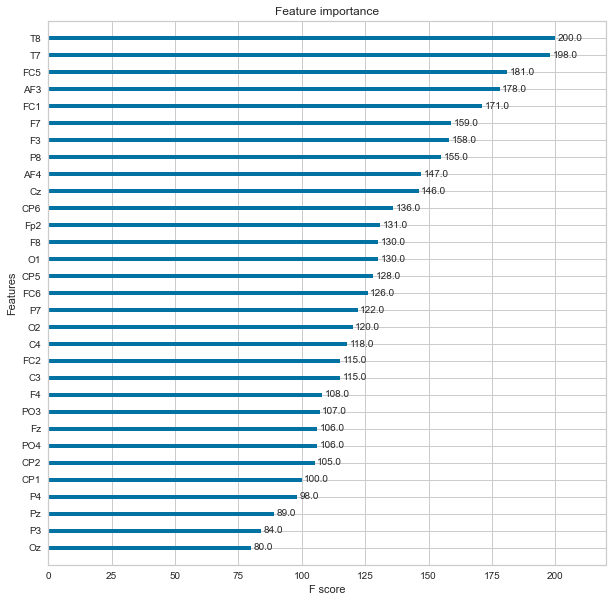

In [538]:
# plot feature importance
from xgboost import plot_importance
import matplotlib.pyplot as plt
#fig, ax = plt.subplots(figsize=(6,6))

plt.rcParams["figure.figsize"] = (10,10)
plot_importance(model)
plt.show()

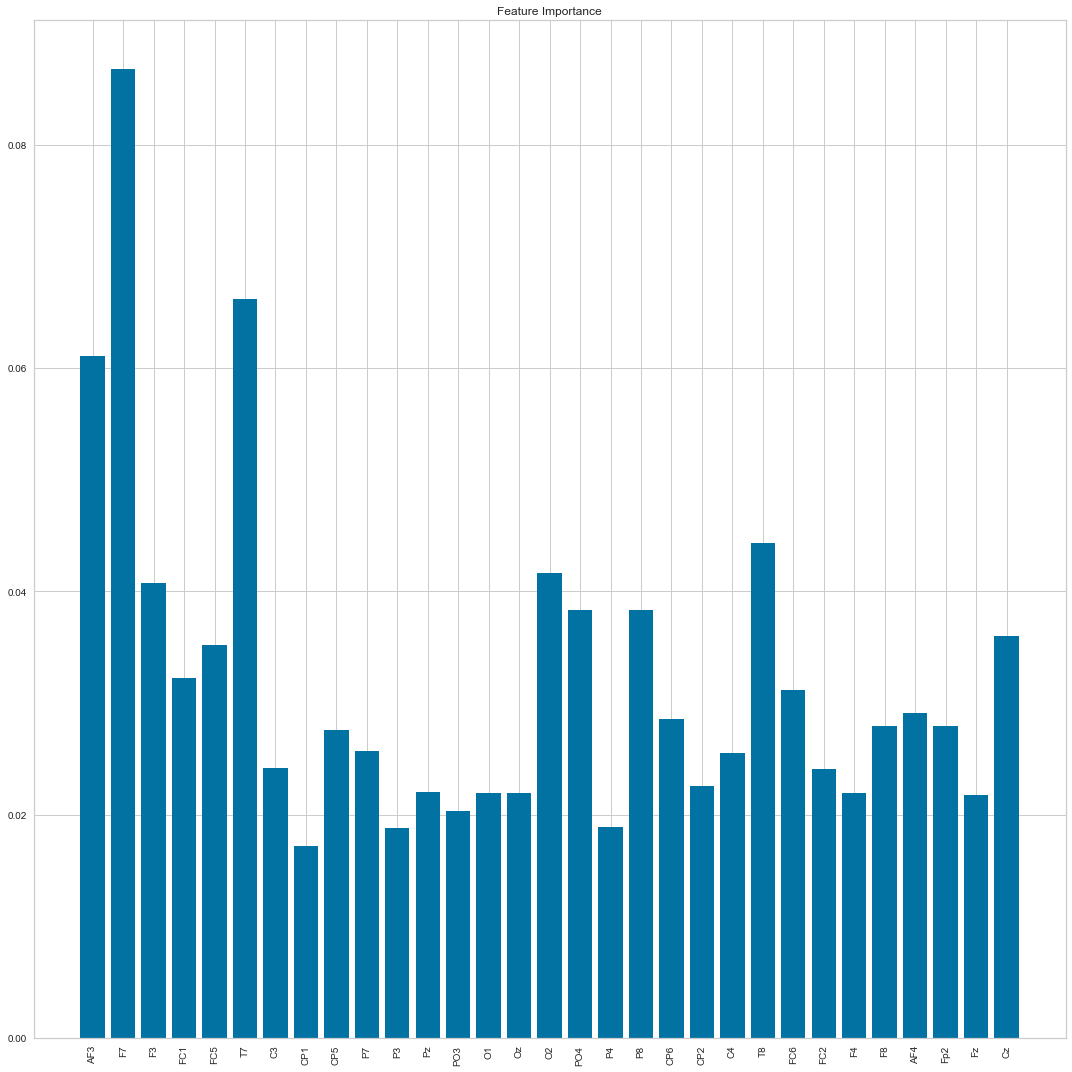

In [539]:
importances = model.feature_importances_
sorted_indices = np.argsort(importances)[::-1]

fig, ax = plt.subplots(figsize=(15,15))
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances, align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns, rotation=90)
plt.tight_layout()
plt.show()

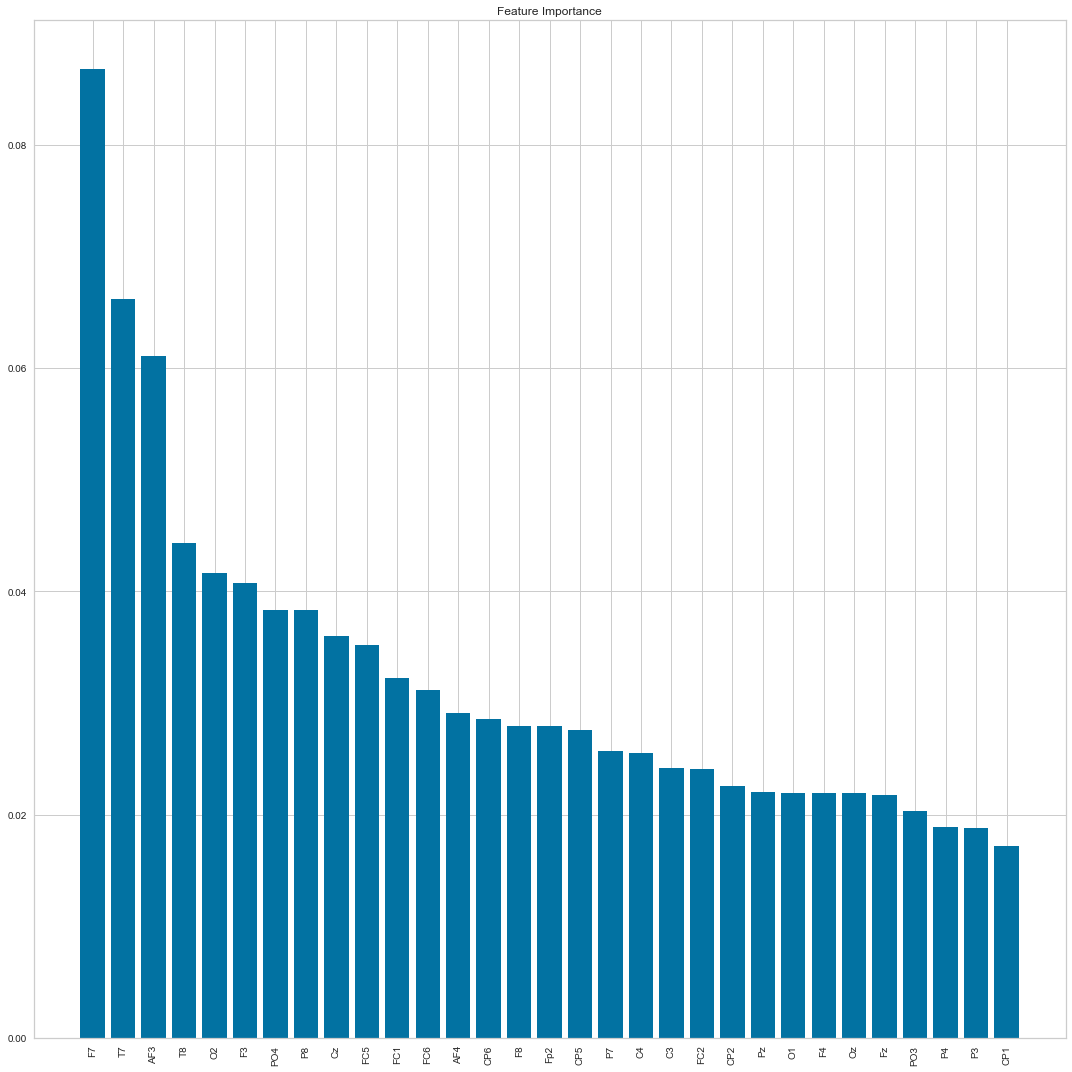

In [540]:
fig, ax = plt.subplots(figsize=(15,15))

importances = model.feature_importances_
#
# Sort the feature importance in descending order
#
sorted_indices = np.argsort(importances)[::-1]
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

In [541]:
importances1 = []
importances1.append(0)
for imp in importances:
    importances1.append(imp)
importances1 = np.array(importances1)
importances1

array([0.        , 0.06107625, 0.08680673, 0.04071362, 0.03225026,
       0.0352363 , 0.06616779, 0.02413396, 0.01714955, 0.0275566 ,
       0.02565578, 0.0188195 , 0.02201746, 0.02033453, 0.02195075,
       0.02192298, 0.04160816, 0.03836281, 0.0189029 , 0.03832737,
       0.02858619, 0.02252718, 0.025521  , 0.04433345, 0.03115923,
       0.02410542, 0.02195   , 0.02797495, 0.02912638, 0.0279704 ,
       0.02173818, 0.03601436])

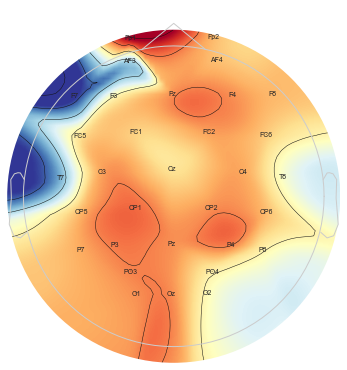

(<matplotlib.image.AxesImage at 0x27b5e2ae6d0>,
 <matplotlib.contour.QuadContourSet at 0x27b5e2aeb80>)

In [542]:
fig, ax = plt.subplots(figsize=(6,6))
cnorm = TwoSlopeNorm(vmin=0, vcenter=(0 + max(importances1))/2, vmax=max(importances1))
mne.viz.plot_topomap(data=importances1, pos=raw.info, names=raw.ch_names, show_names=True, cnorm=cnorm, cmap='RdYlBu')

<h2>3. Petrosian</h2>

In [543]:
petrosian_full_pd['Y'] = 1
petrosian_full['Y'] = 0

In [544]:
X1 = petrosian_full.append(petrosian_full_pd).reset_index().drop('index', axis=1)
X1

,Fp1,AF3,F7,F3,FC1,FC5,T7,C3,CP1,CP5,...,T8,FC6,FC2,F4,F8,AF4,Fp2,Fz,Cz,Y
0,1.008246,1.007155,1.007398,1.007640,1.006302,1.006546,1.007155,1.007883,1.006911,1.007640,...,1.007033,1.006546,1.006668,1.006546,1.007276,1.007398,1.007519,1.006424,1.007155,0
1,1.008246,1.007033,1.007276,1.007519,1.006424,1.006546,1.006790,1.008246,1.007155,1.007398,...,1.006790,1.006668,1.006790,1.006911,1.007155,1.007155,1.007761,1.006302,1.007033,0
2,1.008004,1.007519,1.007519,1.007398,1.006180,1.006424,1.006668,1.008004,1.006790,1.007033,...,1.006546,1.006180,1.006911,1.006668,1.006911,1.007155,1.007519,1.006546,1.006546,0
3,1.008004,1.007398,1.007398,1.007033,1.006302,1.006668,1.007033,1.008004,1.006790,1.007276,...,1.006790,1.006546,1.006790,1.006546,1.006790,1.006790,1.007276,1.006302,1.006546,0
4,1.007519,1.007276,1.007398,1.007033,1.006302,1.006668,1.007033,1.008004,1.006668,1.007398,...,1.006911,1.006668,1.006790,1.006668,1.006911,1.006668,1.006790,1.006424,1.006424,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32907,1.007276,1.007883,1.006546,1.007276,1.007276,1.007033,1.005202,1.006424,1.006424,1.005814,...,1.006546,1.006668,1.006180,1.006790,1.005936,1.007276,1.007761,1.007519,1.005692,1
32908,1.007276,1.007883,1.006790,1.007155,1.007276,1.006790,1.005570,1.006424,1.006668,1.005692,...,1.006058,1.006668,1.005692,1.007033,1.005936,1.007276,1.007883,1.007519,1.005814,1
32909,1.007033,1.007761,1.006911,1.006546,1.006911,1.007033,1.005570,1.006424,1.006546,1.005692,...,1.006180,1.007033,1.005936,1.007519,1.005814,1.007640,1.007640,1.007519,1.005936,1
32910,1.006790,1.007519,1.006911,1.006302,1.006668,1.006790,1.005570,1.006668,1.006180,1.005202,...,1.006302,1.007033,1.006058,1.007640,1.005692,1.007276,1.007033,1.007640,1.006180,1


<h2>Pycaret</h2>

In [453]:
clf = setup(data=X1, target='Y', feature_selection=True, feature_selection_threshold=0.8)

,Description,Value
0,session_id,8037
1,Target,Y
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(32912, 33)"
5,Missing Values,False
6,Numeric Features,32
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [454]:
compare_models(fold=15)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.9947,0.9998,0.9965,0.9939,0.9952,0.9893,0.9893,0.5420
et,Extra Trees Classifier,0.9784,0.9976,0.9775,0.9831,0.9803,0.9565,0.9565,0.3480
rf,Random Forest Classifier,0.9659,0.9945,0.9655,0.9722,0.9688,0.9313,0.9313,0.4167
xgboost,Extreme Gradient Boosting,0.9608,0.9934,0.9633,0.9651,0.9642,0.9208,0.9208,0.3667
lightgbm,Light Gradient Boosting Machine,0.9386,0.9861,0.9425,0.9453,0.9439,0.8760,0.8761,0.0753
qda,Quadratic Discriminant Analysis,0.8962,0.9647,0.8976,0.9117,0.9046,0.7907,0.7909,0.0260
gbc,Gradient Boosting Classifier,0.8756,0.9489,0.8923,0.8824,0.8872,0.7486,0.7488,0.5980
dt,Decision Tree Classifier,0.8725,0.8711,0.8858,0.8822,0.8840,0.7425,0.7426,0.0440
ada,Ada Boost Classifier,0.7953,0.8788,0.8211,0.8087,0.8148,0.5861,0.5864,0.1427
lda,Linear Discriminant Analysis,0.7888,0.8726,0.8173,0.8016,0.8093,0.5728,0.5730,0.0407


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

In [455]:
knn = create_model('knn', n_neighbors=4, fold=15)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9974,1.0000,0.9952,1.0000,0.9976,0.9947,0.9948
1,0.9967,0.9999,0.9952,0.9988,0.9970,0.9934,0.9934
2,0.9967,0.9999,0.9941,1.0000,0.9970,0.9934,0.9935
3,0.9961,0.9999,0.9929,1.0000,0.9964,0.9921,0.9922
4,0.9954,0.9999,0.9917,1.0000,0.9958,0.9908,0.9909
5,0.9967,1.0000,0.9941,1.0000,0.9970,0.9934,0.9935
6,0.9980,1.0000,0.9964,1.0000,0.9982,0.9961,0.9961
7,0.9961,0.9999,0.9929,1.0000,0.9964,0.9921,0.9922
8,0.9948,0.9999,0.9929,0.9976,0.9952,0.9895,0.9895


<h2>KNN gives highest with 99.60%</h2>

In [456]:
X = X1.iloc[:, :-1]
X

,Fp1,AF3,F7,F3,FC1,FC5,T7,C3,CP1,CP5,...,C4,T8,FC6,FC2,F4,F8,AF4,Fp2,Fz,Cz
0,1.008246,1.007155,1.007398,1.007640,1.006302,1.006546,1.007155,1.007883,1.006911,1.007640,...,1.006058,1.007033,1.006546,1.006668,1.006546,1.007276,1.007398,1.007519,1.006424,1.007155
1,1.008246,1.007033,1.007276,1.007519,1.006424,1.006546,1.006790,1.008246,1.007155,1.007398,...,1.006180,1.006790,1.006668,1.006790,1.006911,1.007155,1.007155,1.007761,1.006302,1.007033
2,1.008004,1.007519,1.007519,1.007398,1.006180,1.006424,1.006668,1.008004,1.006790,1.007033,...,1.005936,1.006546,1.006180,1.006911,1.006668,1.006911,1.007155,1.007519,1.006546,1.006546
3,1.008004,1.007398,1.007398,1.007033,1.006302,1.006668,1.007033,1.008004,1.006790,1.007276,...,1.006302,1.006790,1.006546,1.006790,1.006546,1.006790,1.006790,1.007276,1.006302,1.006546
4,1.007519,1.007276,1.007398,1.007033,1.006302,1.006668,1.007033,1.008004,1.006668,1.007398,...,1.006302,1.006911,1.006668,1.006790,1.006668,1.006911,1.006668,1.006790,1.006424,1.006424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32907,1.007276,1.007883,1.006546,1.007276,1.007276,1.007033,1.005202,1.006424,1.006424,1.005814,...,1.006424,1.006546,1.006668,1.006180,1.006790,1.005936,1.007276,1.007761,1.007519,1.005692
32908,1.007276,1.007883,1.006790,1.007155,1.007276,1.006790,1.005570,1.006424,1.006668,1.005692,...,1.006180,1.006058,1.006668,1.005692,1.007033,1.005936,1.007276,1.007883,1.007519,1.005814
32909,1.007033,1.007761,1.006911,1.006546,1.006911,1.007033,1.005570,1.006424,1.006546,1.005692,...,1.006180,1.006180,1.007033,1.005936,1.007519,1.005814,1.007640,1.007640,1.007519,1.005936
32910,1.006790,1.007519,1.006911,1.006302,1.006668,1.006790,1.005570,1.006668,1.006180,1.005202,...,1.006058,1.006302,1.007033,1.006058,1.007640,1.005692,1.007276,1.007033,1.007640,1.006180


In [545]:
X3 = X1.iloc[:,1:]
X = X3.iloc[:,:-1]
Y = X3['Y']

In [546]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33, random_state = 123)

In [547]:
y_train

19400    1
21940    1
9596     0
23981    1
10523    0
        ..
7763     0
15377    1
17730    1
28030    1
15725    1
Name: Y, Length: 22051, dtype: int64

In [548]:
X_train

,AF3,F7,F3,FC1,FC5,T7,C3,CP1,CP5,P7,...,C4,T8,FC6,FC2,F4,F8,AF4,Fp2,Fz,Cz
19400,1.008004,1.008729,1.008125,1.007519,1.008246,1.008850,1.008246,1.005814,1.007761,1.008729,...,1.007398,1.008125,1.008125,1.007640,1.007640,1.006668,1.008004,1.007155,1.007398,1.007276
21940,1.007883,1.008729,1.008246,1.008004,1.008609,1.008246,1.007640,1.006180,1.008367,1.007276,...,1.008488,1.009091,1.009332,1.008246,1.008488,1.008125,1.008609,1.008850,1.008004,1.008367
9596,1.008609,1.008850,1.008367,1.008367,1.008729,1.008971,1.007883,1.007519,1.008729,1.007640,...,1.008367,1.007883,1.008609,1.008125,1.007519,1.007398,1.007883,1.008367,1.007640,1.007883
23981,1.007883,1.007033,1.007033,1.007033,1.006546,1.007519,1.007276,1.007033,1.006790,1.007276,...,1.006790,1.008004,1.007761,1.006424,1.007883,1.006790,1.007276,1.008004,1.007155,1.005936
10523,1.007883,1.008609,1.008004,1.007640,1.007276,1.007640,1.007519,1.007276,1.006546,1.006302,...,1.007519,1.007761,1.008609,1.007761,1.008367,1.007761,1.008125,1.006790,1.007519,1.006546
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7763,1.006790,1.007276,1.006546,1.006668,1.006790,1.006911,1.007398,1.006668,1.007033,1.006911,...,1.007398,1.007761,1.007761,1.006180,1.006668,1.007155,1.007155,1.006058,1.005570,1.006180
15377,1.005936,1.005447,1.005202,1.005447,1.006424,1.005936,1.005936,1.004834,1.004220,1.004712,...,1.004712,1.006424,1.004712,1.005814,1.005447,1.005936,1.006180,1.005202,1.004589,1.006180
17730,1.006668,1.007761,1.005814,1.005936,1.006546,1.005814,1.006668,1.005936,1.006546,1.007519,...,1.006058,1.007276,1.006668,1.005936,1.006424,1.007155,1.008367,1.006911,1.005692,1.006790
28030,1.006546,1.006058,1.007033,1.006790,1.006546,1.005570,1.006546,1.005814,1.005692,1.006302,...,1.006058,1.006790,1.007033,1.006180,1.006668,1.006911,1.007276,1.006790,1.006668,1.005936


<h2>XGBoost</h2>

In [549]:
model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 95.58%


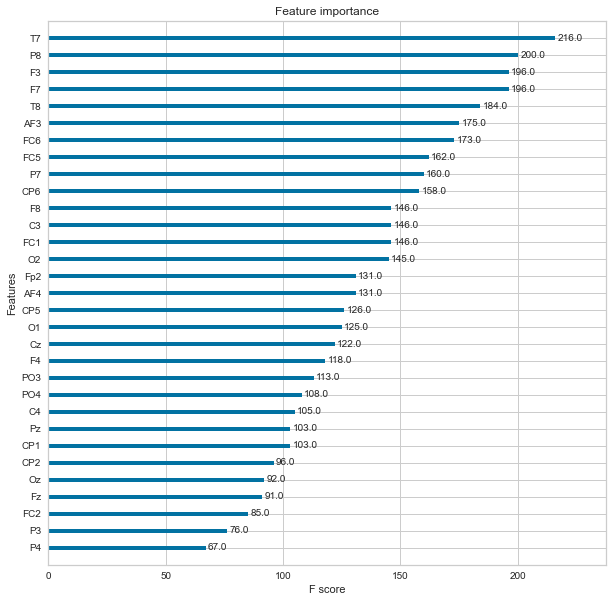

In [550]:
# plot feature importance
from xgboost import plot_importance
import matplotlib.pyplot as plt
#fig, ax = plt.subplots(figsize=(6,6))

plt.rcParams["figure.figsize"] = (10,10)
plot_importance(model)
plt.show()

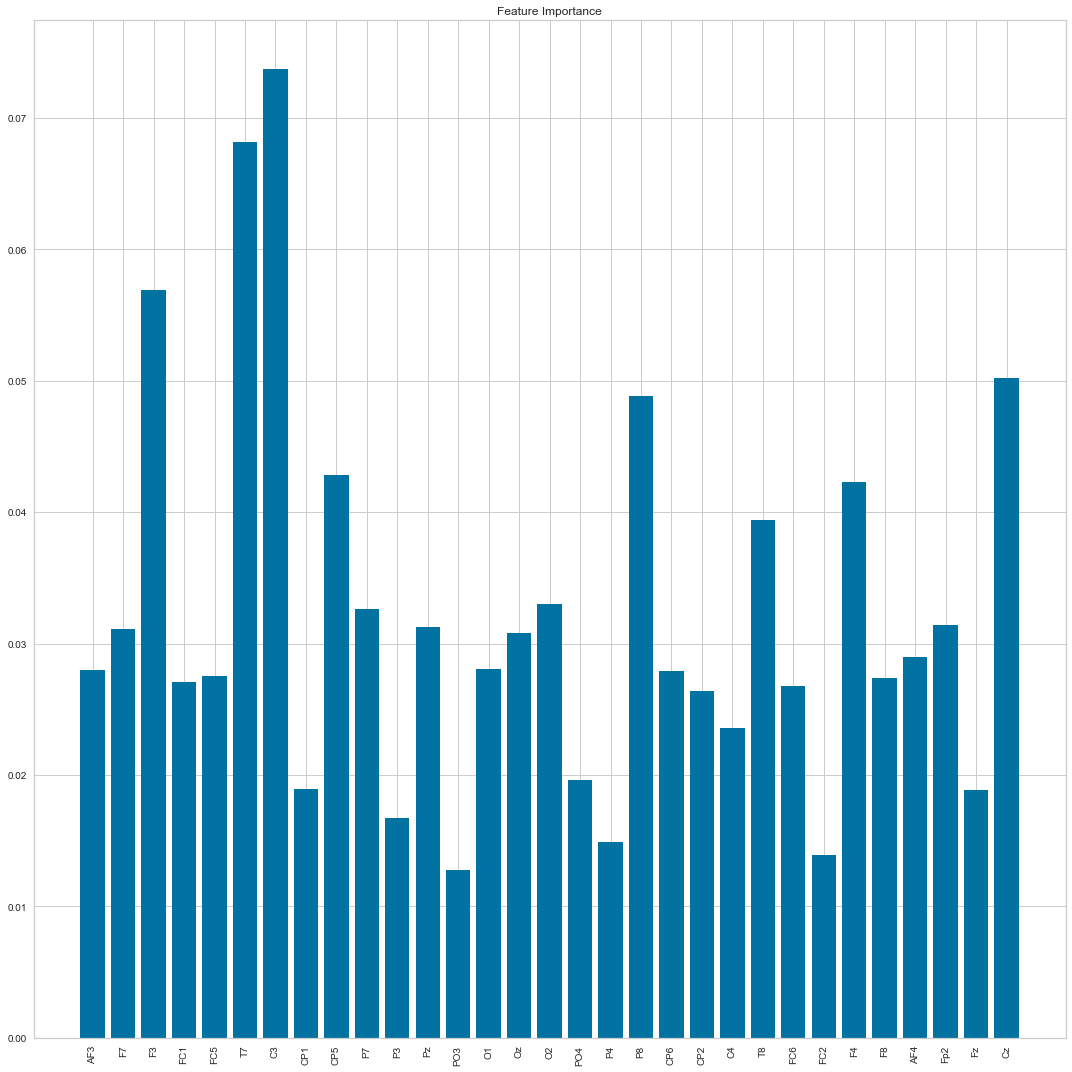

In [551]:
importances = model.feature_importances_
sorted_indices = np.argsort(importances)[::-1]

fig, ax = plt.subplots(figsize=(15,15))
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances, align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns, rotation=90)
plt.tight_layout()
plt.show()

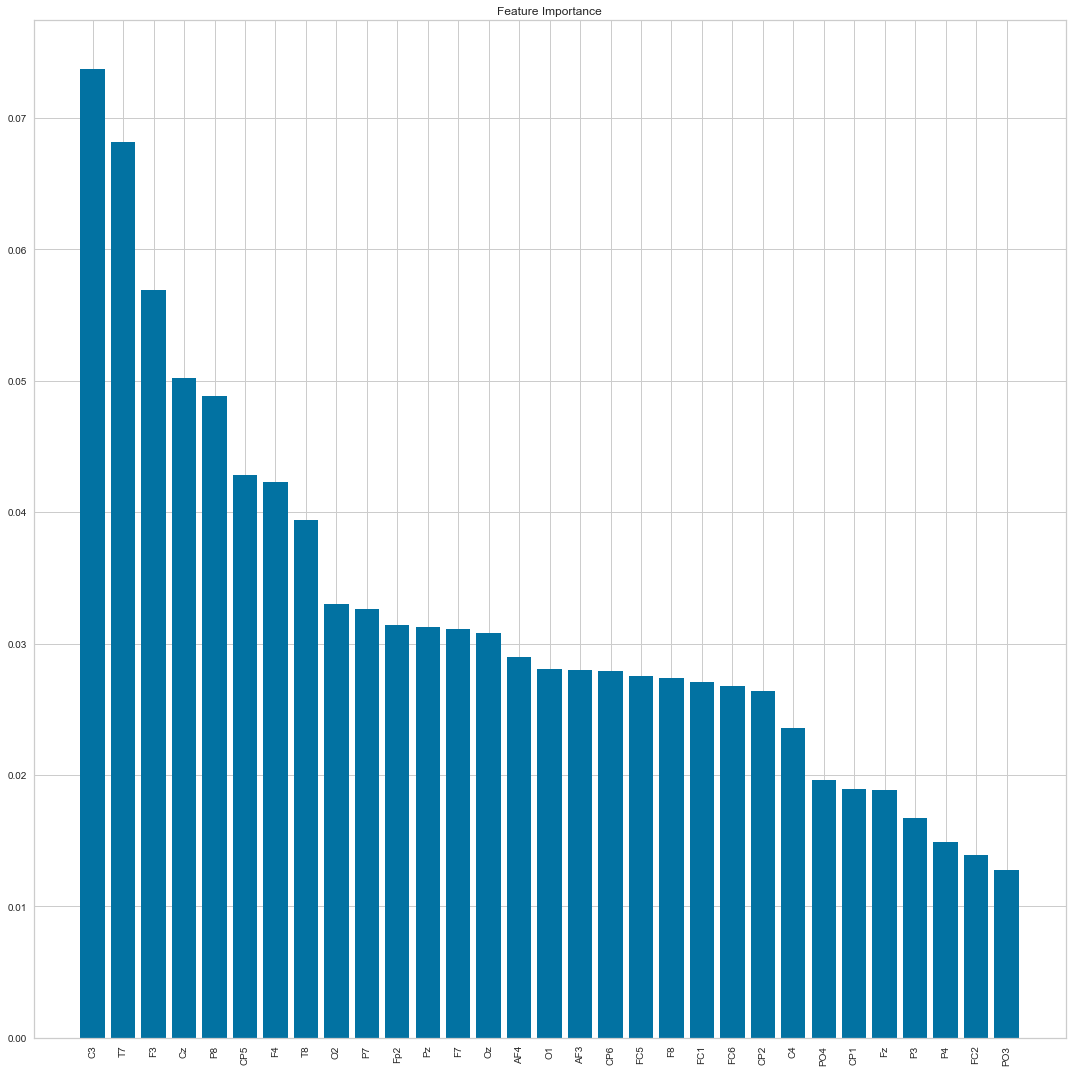

In [552]:
fig, ax = plt.subplots(figsize=(15,15))

importances = model.feature_importances_
#
# Sort the feature importance in descending order
#
sorted_indices = np.argsort(importances)[::-1]
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

In [553]:
importances1 = []
importances1.append(0)
for imp in importances:
    importances1.append(imp)
importances1 = np.array(importances1)
importances1

array([0.        , 0.02797518, 0.03107502, 0.05690773, 0.02709402,
       0.02752676, 0.06814278, 0.0737338 , 0.01891812, 0.04284866,
       0.03263136, 0.01675109, 0.03127084, 0.01273429, 0.02803047,
       0.03079866, 0.0329763 , 0.01960027, 0.01493314, 0.04883991,
       0.02789764, 0.02641451, 0.02360149, 0.03939763, 0.02673911,
       0.01393137, 0.04231862, 0.02738505, 0.02898978, 0.03139909,
       0.0188898 , 0.05024753])

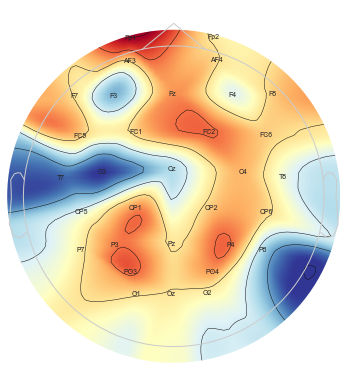

(<matplotlib.image.AxesImage at 0x27b60ecc340>,
 <matplotlib.contour.QuadContourSet at 0x27b60ecc610>)

In [554]:
fig, ax = plt.subplots(figsize=(6,6))
cnorm = TwoSlopeNorm(vmin=0, vcenter=(0 + max(importances1))/2, vmax=max(importances1))
mne.viz.plot_topomap(data=importances1, pos=raw.info, names=raw.ch_names, show_names=True, cnorm=cnorm, cmap='RdYlBu')

In [466]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9886750759598564


<h2>4. Spectral Entropy</h2>

In [555]:
spec_ent_full_pd['Y'] = 1
spec_ent_full['Y'] = 0

In [556]:
X1 = spec_ent_full.append(spec_ent_full_pd).reset_index().drop('index', axis=1)
X1

,Fp1,AF3,F7,F3,FC1,FC5,T7,C3,CP1,CP5,...,T8,FC6,FC2,F4,F8,AF4,Fp2,Fz,Cz,Y
0,0.593160,0.598559,0.563488,0.590472,0.562705,0.562275,0.553198,0.498506,0.429827,0.586307,...,0.613808,0.564724,0.367523,0.445660,0.602557,0.556587,0.540283,0.562066,0.541320,0
1,0.614499,0.606681,0.559590,0.587781,0.564482,0.562040,0.541300,0.480352,0.417072,0.575439,...,0.599018,0.559282,0.429124,0.481380,0.587191,0.579491,0.587149,0.556408,0.539914,0
2,0.607969,0.592293,0.539671,0.550226,0.561478,0.546978,0.518177,0.502615,0.435994,0.577185,...,0.586158,0.562747,0.430763,0.492269,0.576242,0.594057,0.583129,0.570698,0.563965,0
3,0.600888,0.588333,0.546765,0.582698,0.563824,0.569417,0.519913,0.491014,0.407861,0.602747,...,0.600058,0.545492,0.481493,0.452987,0.573931,0.585680,0.576294,0.578565,0.569265,0
4,0.595480,0.605451,0.557263,0.583649,0.557956,0.546623,0.526238,0.519116,0.484884,0.581755,...,0.583858,0.562132,0.541830,0.467034,0.576983,0.587835,0.576875,0.564832,0.549550,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32907,0.517841,0.510925,0.436847,0.526297,0.505866,0.447186,0.480725,0.557299,0.545918,0.507133,...,0.484904,0.531515,0.490141,0.521785,0.492363,0.493306,0.515453,0.525555,0.514605,1
32908,0.505686,0.479389,0.479226,0.513151,0.537017,0.469743,0.506694,0.549038,0.533137,0.496452,...,0.463200,0.510285,0.498320,0.501529,0.443065,0.481113,0.501123,0.478762,0.530072,1
32909,0.518001,0.507293,0.472816,0.548345,0.529189,0.454833,0.509023,0.529810,0.554771,0.490869,...,0.507521,0.543787,0.503191,0.529465,0.478699,0.500297,0.519402,0.525443,0.531926,1
32910,0.492463,0.508322,0.447000,0.527992,0.540703,0.439222,0.479878,0.505936,0.554732,0.472310,...,0.466064,0.518149,0.522514,0.527221,0.443895,0.476518,0.496723,0.510932,0.538645,1


In [469]:
clf = setup(data=X1, target='Y', feature_selection=True, feature_selection_threshold=0.8)

,Description,Value
0,session_id,7414
1,Target,Y
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(32912, 33)"
5,Missing Values,False
6,Numeric Features,32
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [470]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.9681,0.9949,0.9833,0.9594,0.9712,0.9354,0.9357,0.7890
et,Extra Trees Classifier,0.9506,0.9904,0.9627,0.9479,0.9552,0.9001,0.9003,0.3660
xgboost,Extreme Gradient Boosting,0.9396,0.9863,0.9543,0.9366,0.9453,0.8778,0.8780,1.8170
rf,Random Forest Classifier,0.9333,0.9820,0.9436,0.9352,0.9394,0.8653,0.8654,0.8770
lightgbm,Light Gradient Boosting Machine,0.9196,0.9771,0.9372,0.9178,0.9274,0.8374,0.8377,0.1360
qda,Quadratic Discriminant Analysis,0.8660,0.9411,0.9143,0.8518,0.8819,0.7274,0.7299,0.0310
gbc,Gradient Boosting Classifier,0.8488,0.9280,0.8877,0.8442,0.8654,0.6931,0.6944,2.3550
dt,Decision Tree Classifier,0.8180,0.8164,0.8330,0.8344,0.8337,0.6327,0.6328,0.1340
ada,Ada Boost Classifier,0.7717,0.8473,0.8137,0.7793,0.7961,0.5371,0.5379,0.4920
lda,Linear Discriminant Analysis,0.7576,0.8312,0.7928,0.7710,0.7817,0.5094,0.5097,0.0450


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

In [471]:
compare_models(fold=15)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.9702,0.9955,0.9841,0.9624,0.9731,0.9398,0.9401,0.5580
et,Extra Trees Classifier,0.9506,0.9907,0.9648,0.9461,0.9553,0.9001,0.9004,0.4067
xgboost,Extreme Gradient Boosting,0.9408,0.9865,0.9535,0.9394,0.9464,0.8804,0.8806,1.7027
rf,Random Forest Classifier,0.9338,0.9826,0.9428,0.9367,0.9398,0.8663,0.8664,0.9273
lightgbm,Light Gradient Boosting Machine,0.9200,0.9776,0.9381,0.9178,0.9278,0.8382,0.8385,0.1560
qda,Quadratic Discriminant Analysis,0.8663,0.9413,0.9141,0.8525,0.8822,0.7280,0.7305,0.0307
gbc,Gradient Boosting Classifier,0.8484,0.9291,0.8864,0.8446,0.8649,0.6924,0.6935,1.9507
dt,Decision Tree Classifier,0.8193,0.8175,0.8362,0.8342,0.8352,0.6352,0.6353,0.1180
ada,Ada Boost Classifier,0.7726,0.8479,0.8126,0.7810,0.7964,0.5391,0.5397,0.3987
ridge,Ridge Classifier,0.7581,0.0000,0.7930,0.7716,0.7821,0.5102,0.5106,0.0140


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

In [472]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9886750759598564


In [557]:
X3 = X1.iloc[:,1:]
X = X3.iloc[:,:-1]
Y = X3['Y']

In [558]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33, random_state = 123)

In [559]:
X_train

,AF3,F7,F3,FC1,FC5,T7,C3,CP1,CP5,P7,...,C4,T8,FC6,FC2,F4,F8,AF4,Fp2,Fz,Cz
19400,0.583479,0.589430,0.583147,0.510421,0.609886,0.600919,0.609905,0.519833,0.603660,0.595499,...,0.565224,0.582583,0.617111,0.591466,0.601011,0.594819,0.617412,0.621465,0.548282,0.598625
21940,0.567541,0.604372,0.584216,0.573384,0.597382,0.605569,0.543079,0.552033,0.598704,0.497269,...,0.619116,0.618195,0.611368,0.586399,0.563680,0.568055,0.605289,0.565812,0.553670,0.565486
9596,0.528842,0.592682,0.551423,0.465190,0.610625,0.607506,0.610088,0.466802,0.538649,0.543959,...,0.629666,0.581361,0.600916,0.562653,0.530969,0.564557,0.525780,0.540969,0.486771,0.563757
23981,0.558741,0.538378,0.527347,0.551620,0.487696,0.499353,0.546701,0.561967,0.502763,0.547751,...,0.472357,0.575661,0.569607,0.541067,0.548802,0.517695,0.568661,0.599704,0.531237,0.536031
10523,0.587809,0.607595,0.600989,0.465232,0.598009,0.621730,0.525681,0.559134,0.573207,0.551833,...,0.550039,0.602406,0.593472,0.597844,0.599265,0.611232,0.579177,0.606182,0.578757,0.579233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7763,0.552541,0.521787,0.565901,0.537715,0.578338,0.600106,0.552178,0.559887,0.569144,0.555908,...,0.486576,0.613253,0.587781,0.533932,0.587171,0.576995,0.588686,0.514290,0.509655,0.487392
15377,0.518460,0.502654,0.493966,0.520498,0.543408,0.506232,0.499866,0.447510,0.487751,0.470747,...,0.466768,0.471093,0.499372,0.472973,0.483380,0.525743,0.513624,0.515871,0.471355,0.495341
17730,0.416822,0.395960,0.426926,0.421942,0.355002,0.338414,0.459490,0.391733,0.398339,0.450769,...,0.416902,0.446772,0.420955,0.447799,0.453962,0.477209,0.593497,0.491621,0.452637,0.497818
28030,0.532562,0.473694,0.558329,0.527974,0.517093,0.466921,0.551786,0.518343,0.472399,0.460381,...,0.533051,0.567050,0.570825,0.525874,0.558629,0.564510,0.569577,0.553864,0.539536,0.567767


In [560]:
model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 92.34%


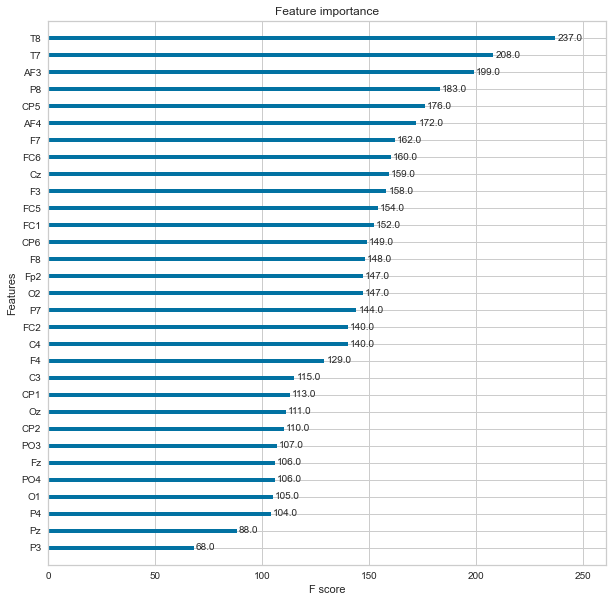

In [561]:
# plot feature importance
from xgboost import plot_importance
import matplotlib.pyplot as plt
#fig, ax = plt.subplots(figsize=(6,6))

plt.rcParams["figure.figsize"] = (10,10)
plot_importance(model)
plt.show()

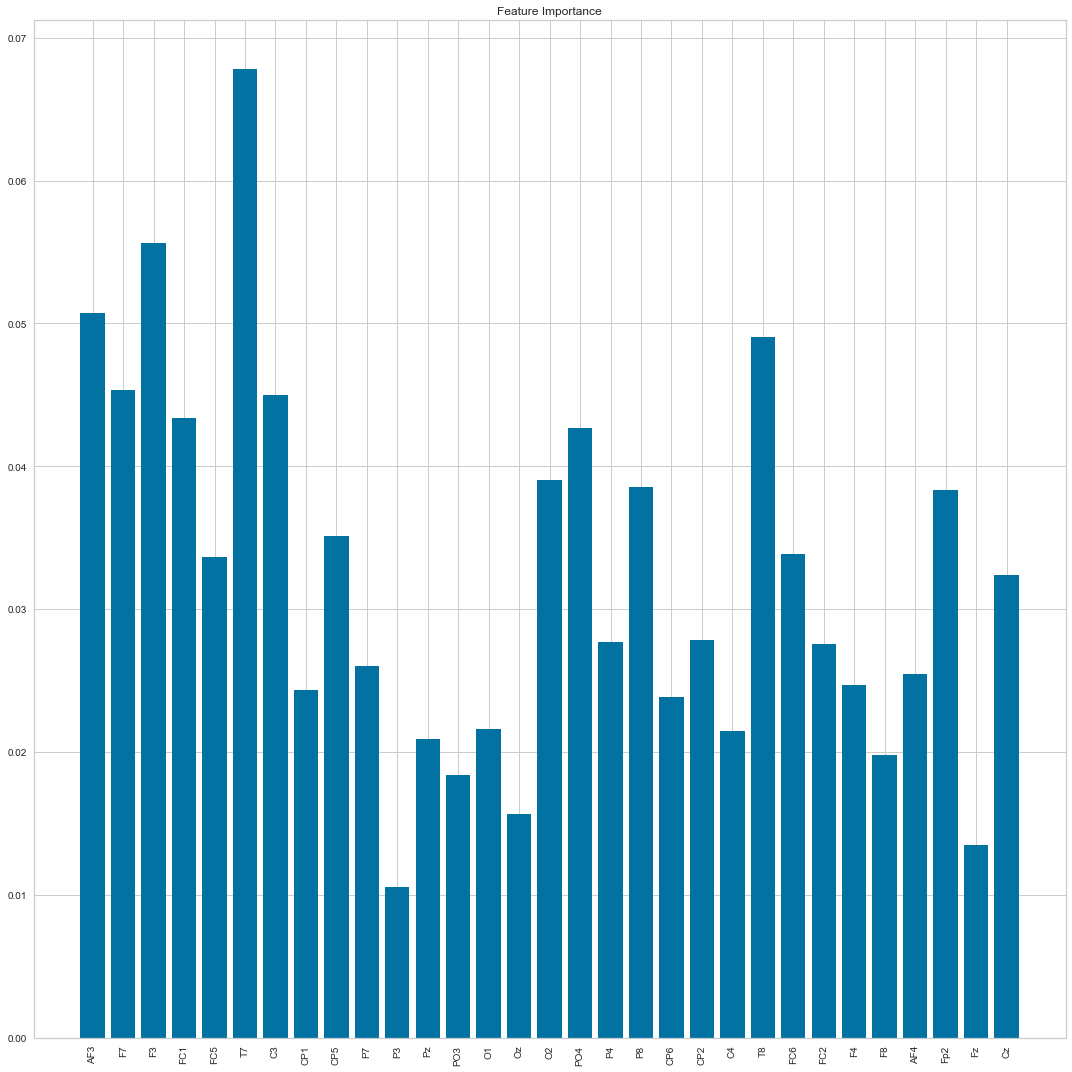

In [562]:
importances = model.feature_importances_
sorted_indices = np.argsort(importances)[::-1]

fig, ax = plt.subplots(figsize=(15,15))
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances, align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns, rotation=90)
plt.tight_layout()
plt.show()

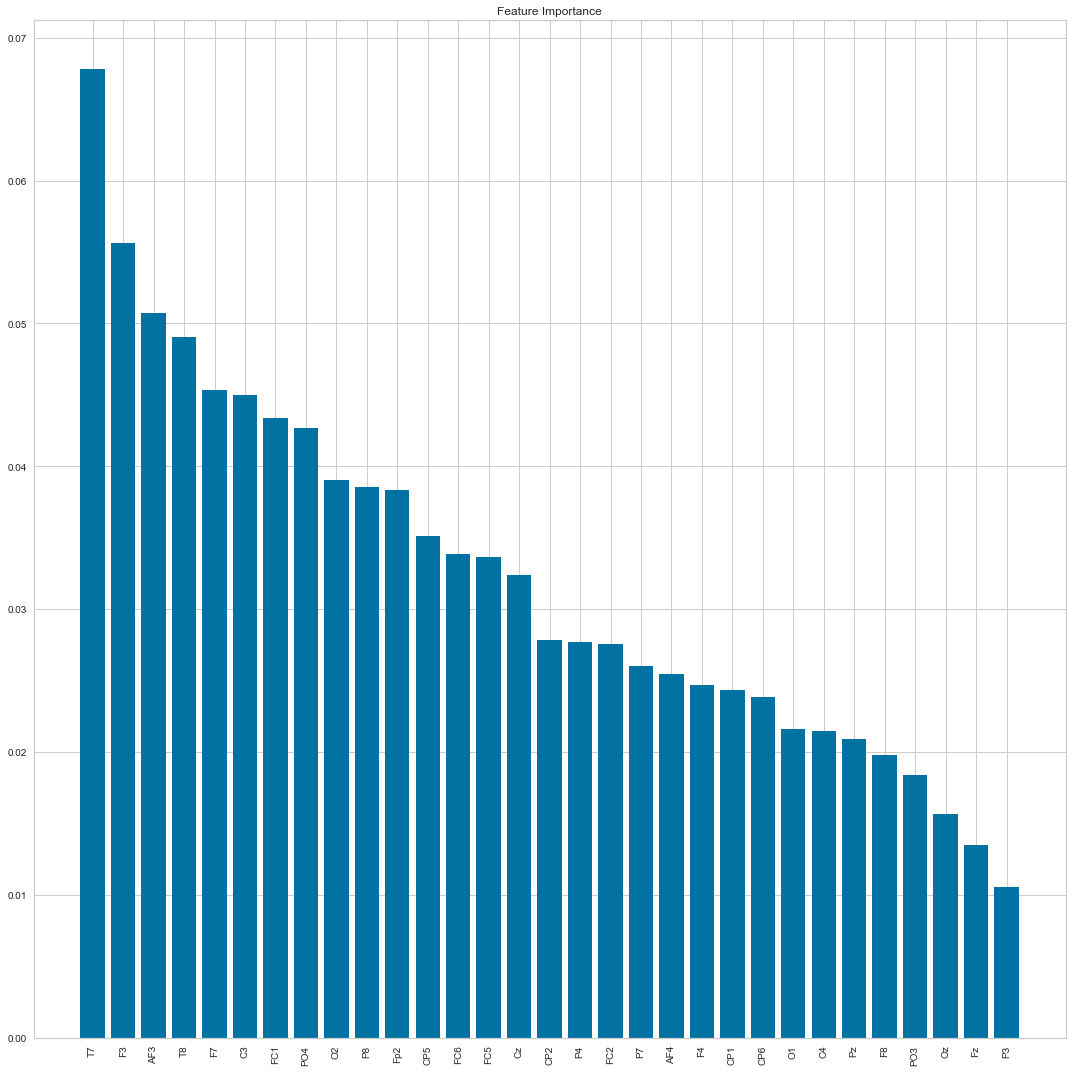

In [563]:
fig, ax = plt.subplots(figsize=(15,15))

importances = model.feature_importances_
#
# Sort the feature importance in descending order
#
sorted_indices = np.argsort(importances)[::-1]
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

In [564]:
importances1 = []
importances1.append(0)
for imp in importances:
    importances1.append(imp)
importances1 = np.array(importances1)
importances1

array([0.        , 0.05073132, 0.04530581, 0.05559456, 0.04341259,
       0.03362359, 0.06781244, 0.04496425, 0.02433695, 0.03513953,
       0.02602457, 0.01057581, 0.02094536, 0.01842765, 0.02162876,
       0.01565977, 0.03907213, 0.04265449, 0.02771169, 0.03855854,
       0.02386712, 0.02782886, 0.02144638, 0.0490334 , 0.03385766,
       0.02759189, 0.02472032, 0.01982638, 0.0254439 , 0.03836859,
       0.01347776, 0.03235798])

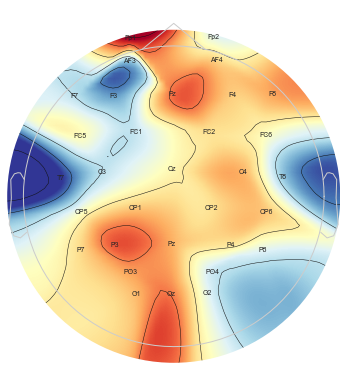

(<matplotlib.image.AxesImage at 0x27b69cec670>,
 <matplotlib.contour.QuadContourSet at 0x27b69cec940>)

In [565]:
fig, ax = plt.subplots(figsize=(6,6))
cnorm = TwoSlopeNorm(vmin=0, vcenter=(0 + max(importances1))/2, vmax=max(importances1))
mne.viz.plot_topomap(data=importances1, pos=raw.info, names=raw.ch_names, show_names=True, cnorm=cnorm, cmap='RdYlBu')

<h2>5. Permutation Entropy</h2>

In [566]:
perm_ent_full_pd['Y'] = 1
perm_ent_full['Y'] = 0

In [567]:
X1 = perm_ent_full.append(perm_ent_full_pd).reset_index().drop('index', axis=1)
X1

,Fp1,AF3,F7,F3,FC1,FC5,T7,C3,CP1,CP5,...,T8,FC6,FC2,F4,F8,AF4,Fp2,Fz,Cz,Y
0,0.654356,0.626905,0.631979,0.637859,0.605390,0.611868,0.627426,0.645032,0.619322,0.639797,...,0.624767,0.612870,0.616309,0.609764,0.630926,0.631506,0.636615,0.610002,0.624334,0
1,0.653945,0.622973,0.628522,0.634475,0.607364,0.613133,0.618582,0.654253,0.627936,0.633841,...,0.618889,0.615945,0.619347,0.618315,0.627325,0.627862,0.641720,0.606476,0.620810,0
2,0.647714,0.636437,0.635013,0.631686,0.601853,0.610032,0.615435,0.648375,0.618399,0.625223,...,0.612971,0.603229,0.622163,0.613335,0.621468,0.627775,0.636105,0.612959,0.609010,0
3,0.644722,0.631972,0.631176,0.623220,0.604789,0.615969,0.624441,0.648134,0.618915,0.630958,...,0.619106,0.612913,0.617679,0.611856,0.617060,0.618568,0.629502,0.606757,0.612376,0
4,0.634854,0.628848,0.630455,0.623631,0.604964,0.615844,0.624330,0.648162,0.615618,0.633811,...,0.621299,0.613941,0.617933,0.615657,0.618040,0.615651,0.618568,0.609478,0.609369,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32907,0.630709,0.644177,0.611905,0.627264,0.630097,0.624447,0.576569,0.607026,0.609011,0.593362,...,0.612659,0.614094,0.601857,0.618769,0.595866,0.626771,0.642671,0.634087,0.590376,1
32908,0.629881,0.642874,0.618576,0.622660,0.631364,0.618363,0.587100,0.607589,0.616074,0.590187,...,0.599963,0.614268,0.588139,0.625093,0.596543,0.627284,0.645617,0.633982,0.592740,1
32909,0.623677,0.640924,0.622244,0.603629,0.622105,0.622479,0.586488,0.606120,0.612961,0.588475,...,0.602891,0.624195,0.594126,0.637054,0.593085,0.636239,0.639455,0.632661,0.596076,1
32910,0.617503,0.635233,0.621748,0.600816,0.616031,0.615748,0.586701,0.611362,0.602947,0.574428,...,0.606585,0.624075,0.597670,0.640228,0.589494,0.629646,0.621668,0.631845,0.601327,1


In [484]:
clf = setup(data=X1, target='Y', feature_selection=True, feature_selection_threshold=0.8)

,Description,Value
0,session_id,1782
1,Target,Y
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(32912, 33)"
5,Missing Values,False
6,Numeric Features,32
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [485]:
compare_models(fold=15)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.9944,0.9997,0.9963,0.9935,0.9949,0.9886,0.9886,0.5433
et,Extra Trees Classifier,0.9772,0.9972,0.9767,0.9816,0.9791,0.9539,0.9540,0.3853
rf,Random Forest Classifier,0.9582,0.9925,0.9594,0.9642,0.9617,0.9156,0.9156,0.8673
xgboost,Extreme Gradient Boosting,0.9562,0.9925,0.9612,0.9591,0.9601,0.9116,0.9116,1.3280
lightgbm,Light Gradient Boosting Machine,0.9375,0.9855,0.9436,0.9426,0.9431,0.8739,0.8740,0.1487
qda,Quadratic Discriminant Analysis,0.8883,0.9599,0.8900,0.9048,0.8973,0.7748,0.7751,0.0253
gbc,Gradient Boosting Classifier,0.8745,0.9474,0.8902,0.8821,0.8860,0.7463,0.7465,1.8020
dt,Decision Tree Classifier,0.8662,0.8649,0.8785,0.8776,0.8780,0.7298,0.7299,0.1007
ada,Ada Boost Classifier,0.7946,0.8773,0.8177,0.8096,0.8136,0.5850,0.5851,0.3573
lda,Linear Discriminant Analysis,0.7822,0.8669,0.8058,0.7987,0.8022,0.5600,0.5601,0.0427


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

In [486]:
knn = create_model('knn', n_neighbors=4, fold=15)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9961,0.9993,0.9929,1.0000,0.9964,0.9921,0.9922
1,0.9948,0.9998,0.9929,0.9976,0.9952,0.9895,0.9895
2,0.9954,0.9999,0.9941,0.9976,0.9958,0.9908,0.9908
3,0.9948,0.9999,0.9941,0.9964,0.9952,0.9895,0.9895
4,0.9954,0.9999,0.9941,0.9976,0.9958,0.9908,0.9908
5,0.9928,0.9999,0.9869,1.0000,0.9934,0.9856,0.9857
6,0.9974,0.9999,0.9964,0.9988,0.9976,0.9947,0.9947
7,0.9961,0.9999,0.9941,0.9988,0.9964,0.9921,0.9921
8,0.9922,0.9998,0.9869,0.9988,0.9928,0.9842,0.9843


<h2>KNN Gives 91.07% with k=4</h2>

In [487]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.9930,0.9995,0.9960,0.9912,0.9936,0.9858,0.9858,0.8080
et,Extra Trees Classifier,0.9763,0.9970,0.9748,0.9819,0.9783,0.9523,0.9523,0.3520
rf,Random Forest Classifier,0.9574,0.9921,0.9582,0.9640,0.9610,0.9141,0.9142,0.8750
xgboost,Extreme Gradient Boosting,0.9543,0.9919,0.9605,0.9564,0.9584,0.9077,0.9078,1.5570
lightgbm,Light Gradient Boosting Machine,0.9351,0.9842,0.9410,0.9408,0.9408,0.8690,0.8691,0.1320
qda,Quadratic Discriminant Analysis,0.8881,0.9599,0.8902,0.9043,0.8972,0.7746,0.7747,0.0310
gbc,Gradient Boosting Classifier,0.8741,0.9475,0.8904,0.8813,0.8858,0.7456,0.7457,2.1860
dt,Decision Tree Classifier,0.8606,0.8590,0.8751,0.8712,0.8731,0.7184,0.7185,0.1260
ada,Ada Boost Classifier,0.7946,0.8775,0.8198,0.8082,0.8139,0.5846,0.5848,0.4520
lda,Linear Discriminant Analysis,0.7822,0.8671,0.8061,0.7985,0.8022,0.5599,0.5599,0.0450


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

In [568]:
X3 = X1.iloc[:,1:]
X = X3.iloc[:,:-1]
Y = X3['Y']

In [569]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33, random_state = 123)

In [570]:
y_train

19400    1
21940    1
9596     0
23981    1
10523    0
        ..
7763     0
15377    1
17730    1
28030    1
15725    1
Name: Y, Length: 22051, dtype: int64

In [571]:
X_train

,AF3,F7,F3,FC1,FC5,T7,C3,CP1,CP5,P7,...,C4,T8,FC6,FC2,F4,F8,AF4,Fp2,Fz,Cz
19400,0.648891,0.665384,0.651727,0.637009,0.654169,0.667740,0.654059,0.592406,0.640978,0.662409,...,0.633978,0.650698,0.650428,0.639910,0.640193,0.616237,0.648915,0.625425,0.633253,0.628100
21940,0.645676,0.665026,0.652263,0.647635,0.660426,0.652461,0.638655,0.600241,0.654198,0.627390,...,0.660198,0.673951,0.678386,0.653883,0.658638,0.650272,0.662990,0.667120,0.648029,0.657207
9596,0.661444,0.668321,0.657460,0.656930,0.665218,0.669267,0.646019,0.636594,0.664611,0.639406,...,0.656447,0.645312,0.661725,0.650925,0.637151,0.632976,0.646142,0.656949,0.640052,0.645100
23981,0.644795,0.623981,0.624209,0.625233,0.611101,0.637220,0.630130,0.624216,0.615511,0.628644,...,0.617409,0.647538,0.642580,0.609375,0.645342,0.614151,0.628930,0.648979,0.627402,0.596639
10523,0.644362,0.662382,0.647607,0.639802,0.629683,0.640291,0.635189,0.631019,0.612784,0.606223,...,0.633601,0.641551,0.660251,0.642590,0.657460,0.642098,0.649443,0.618040,0.637371,0.612699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7763,0.618980,0.630974,0.612049,0.611184,0.619184,0.620919,0.634133,0.614641,0.624987,0.620246,...,0.632864,0.640321,0.642986,0.601772,0.614086,0.626185,0.625197,0.597804,0.585628,0.603405
15377,0.591702,0.579781,0.576514,0.583677,0.605640,0.597205,0.595499,0.565331,0.548488,0.560424,...,0.558924,0.608056,0.562704,0.590846,0.581497,0.596796,0.602837,0.576569,0.558872,0.601440
17730,0.613445,0.641990,0.592009,0.596100,0.609264,0.592806,0.614584,0.596409,0.612990,0.635660,...,0.600285,0.630277,0.614254,0.596886,0.607400,0.627272,0.656865,0.622297,0.589147,0.618491
28030,0.612611,0.600044,0.623089,0.617551,0.609973,0.584701,0.611119,0.593271,0.587593,0.606074,...,0.600200,0.617916,0.625045,0.597519,0.613956,0.621863,0.629810,0.618140,0.615182,0.593195


<h2>KNN</h2>

In [572]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9857287542583556


<h2>XGBoost</h2>

In [573]:
model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 94.93%


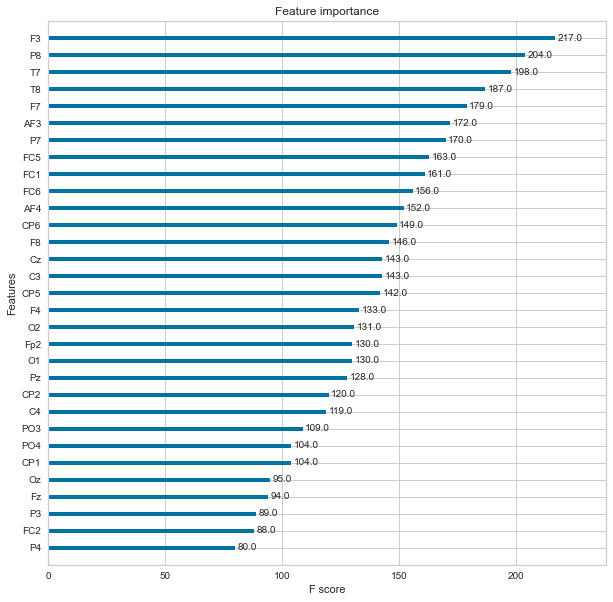

In [574]:
# plot feature importance
from xgboost import plot_importance
import matplotlib.pyplot as plt
#fig, ax = plt.subplots(figsize=(6,6))

plt.rcParams["figure.figsize"] = (10,10)
plot_importance(model)
plt.show()

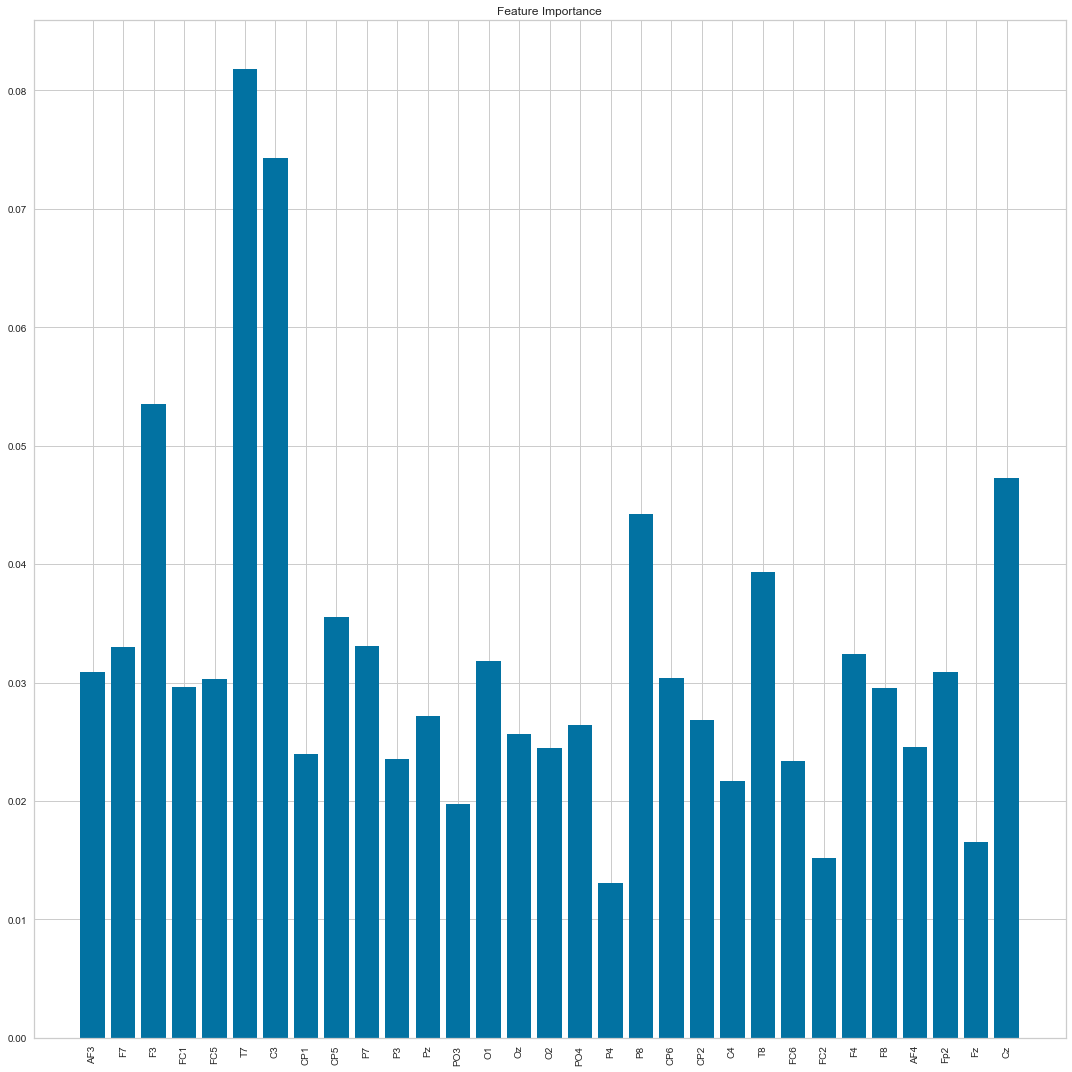

In [575]:
importances = model.feature_importances_
sorted_indices = np.argsort(importances)[::-1]

fig, ax = plt.subplots(figsize=(15,15))
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances, align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns, rotation=90)
plt.tight_layout()
plt.show()

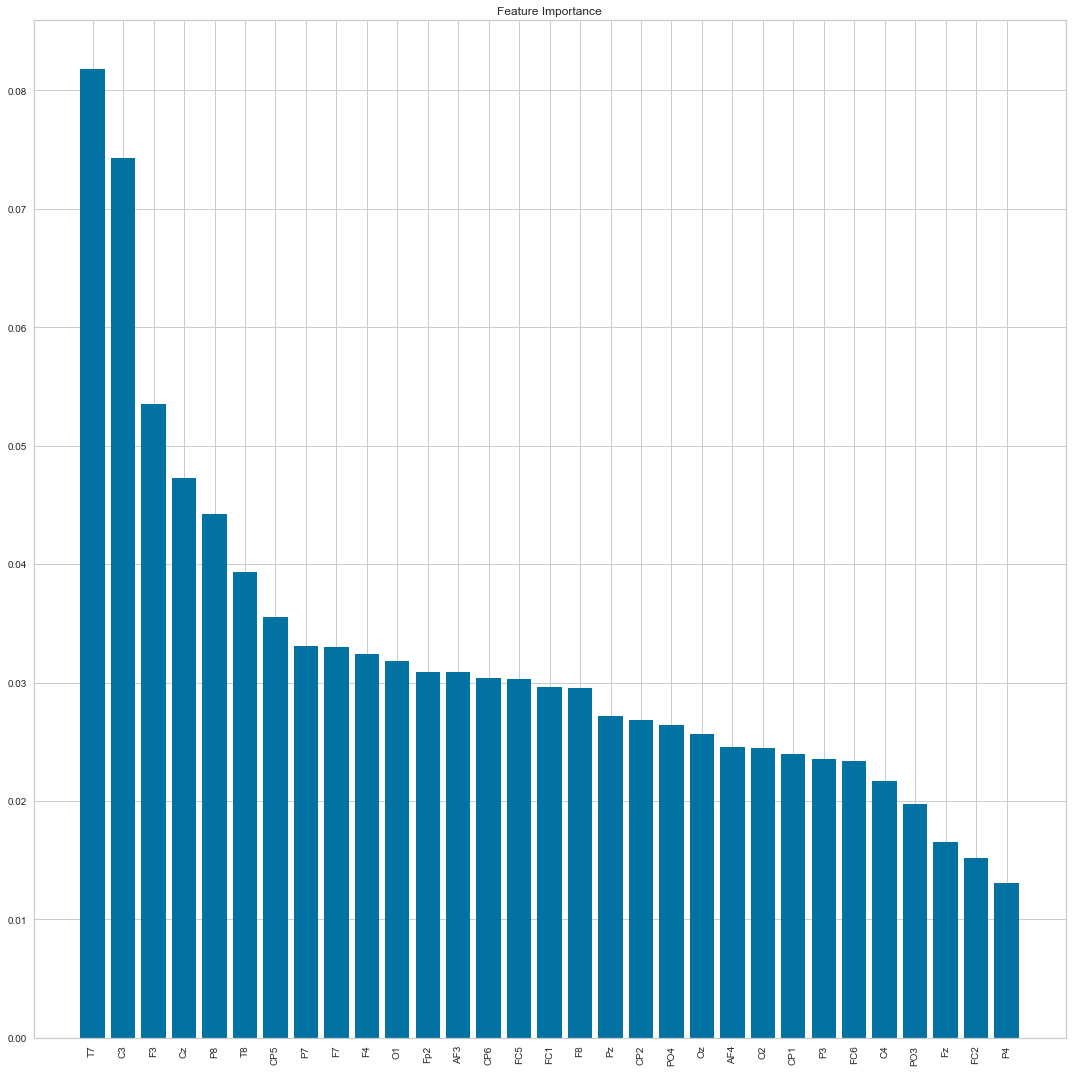

In [576]:
fig, ax = plt.subplots(figsize=(15,15))

importances = model.feature_importances_
#
# Sort the feature importance in descending order
#
sorted_indices = np.argsort(importances)[::-1]
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

In [577]:
importances1 = []
importances1.append(0)
for imp in importances:
    importances1.append(imp)
importances1 = np.array(importances1)
importances1

array([0.        , 0.03084839, 0.03302281, 0.05353783, 0.02965577,
       0.03026451, 0.08181044, 0.07427271, 0.02400143, 0.03555195,
       0.03305794, 0.02354242, 0.02717653, 0.01976075, 0.03185463,
       0.02563233, 0.02450743, 0.02637784, 0.0130661 , 0.0442267 ,
       0.03038879, 0.0268003 , 0.02169467, 0.03937072, 0.02336768,
       0.01514812, 0.03237989, 0.02950455, 0.02455562, 0.03085456,
       0.01649375, 0.04727282])

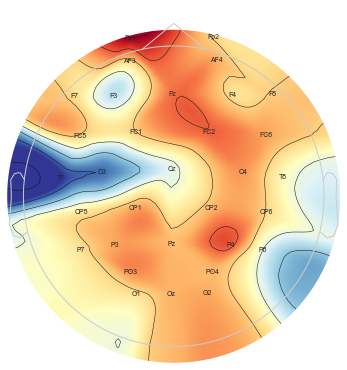

(<matplotlib.image.AxesImage at 0x27b6f0cbe50>,
 <matplotlib.contour.QuadContourSet at 0x27b6f0da130>)

In [578]:
fig, ax = plt.subplots(figsize=(6,6))
cnorm = TwoSlopeNorm(vmin=0, vcenter=(0 + max(importances1))/2, vmax=max(importances1))
mne.viz.plot_topomap(data=importances1, pos=raw.info, names=raw.ch_names, show_names=True, cnorm=cnorm, cmap='RdYlBu')

<h1>For Bands</h1>

<strong>Observations</strong><br>Beta Band independently gives around 73% accuracy. Other bands perform badly

In [499]:
X1_bands = hfd_bands.append(hfd_bands_pd).reset_index().drop('index', axis=1)
X_bands = X1_bands.iloc[:,:-1]
X_bands

,alpha_Fp1,alpha_AF3,alpha_F7,alpha_F3,alpha_FC1,alpha_FC5,alpha_T7,alpha_C3,alpha_CP1,alpha_CP5,...,gamma_C4,gamma_T8,gamma_FC6,gamma_FC2,gamma_F4,gamma_F8,gamma_AF4,gamma_Fp2,gamma_Fz,gamma_Cz
0,1.063729,1.031783,1.050264,1.042895,1.031899,1.057216,1.060657,1.043507,1.033325,1.043580,...,1.308530,1.357972,1.372019,1.371404,1.332065,1.332710,1.376851,1.358760,1.329703,1.373432
1,1.049654,1.045128,1.041528,1.060054,1.052219,1.040177,1.044667,1.026043,1.027101,1.029062,...,1.368061,1.397302,1.374574,1.343962,1.337082,1.396944,1.325803,1.378398,1.334248,1.332956
2,1.027501,1.031195,1.035190,1.023156,1.025721,1.048975,1.034241,1.036083,1.034509,1.038949,...,1.383054,1.409600,1.402875,1.343203,1.319681,1.433501,1.347541,1.407501,1.323958,1.352896
3,1.043863,1.032051,1.045657,1.038998,1.034041,1.038459,1.038104,1.036980,1.041974,1.034295,...,1.322998,1.363307,1.320562,1.320651,1.332270,1.348552,1.373441,1.361434,1.331756,1.312460
4,1.032685,1.029195,1.033271,1.034315,1.031170,1.045502,1.030989,1.041474,1.044485,1.030736,...,1.366030,1.366915,1.346471,1.329810,1.339785,1.324244,1.341550,1.329484,1.287329,1.411439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3295,1.048953,1.039767,1.043729,1.039767,1.042372,1.036474,1.038748,1.049053,1.051555,1.041726,...,1.341224,1.339992,1.344367,1.393019,1.347802,1.359949,1.400746,1.397268,1.362487,1.386772
3296,1.043803,1.038908,1.039905,1.040598,1.034864,1.044076,1.029794,1.043348,1.042868,1.038692,...,1.372914,1.390258,1.373565,1.429540,1.395160,1.310036,1.375223,1.367086,1.349266,1.335798
3297,1.034912,1.035111,1.033306,1.033218,1.031777,1.037325,1.032079,1.036308,1.027690,1.025350,...,1.372456,1.411485,1.353944,1.377474,1.352756,1.357544,1.386732,1.362618,1.363068,1.373217
3298,1.052967,1.037515,1.047585,1.050545,1.043532,1.048765,1.041013,1.050409,1.033614,1.043472,...,1.326187,1.433108,1.333614,1.356393,1.330498,1.390913,1.374561,1.403777,1.393535,1.357066


In [500]:
X1_bands.iloc[:,96:]

,beta_Fp1,beta_AF3,beta_F7,beta_F3,beta_FC1,beta_FC5,beta_T7,beta_C3,beta_CP1,beta_CP5,...,gamma_T8,gamma_FC6,gamma_FC2,gamma_F4,gamma_F8,gamma_AF4,gamma_Fp2,gamma_Fz,gamma_Cz,Y
0,1.188563,1.157949,1.137056,1.156584,1.144920,1.139088,1.126442,1.141229,1.185807,1.137710,...,1.357972,1.372019,1.371404,1.332065,1.332710,1.376851,1.358760,1.329703,1.373432,0
1,1.105617,1.156488,1.109865,1.110386,1.137780,1.130573,1.118279,1.118199,1.142211,1.140614,...,1.397302,1.374574,1.343962,1.337082,1.396944,1.325803,1.378398,1.334248,1.332956,0
2,1.165876,1.191318,1.147623,1.150406,1.153586,1.172431,1.140683,1.138829,1.125974,1.116023,...,1.409600,1.402875,1.343203,1.319681,1.433501,1.347541,1.407501,1.323958,1.352896,0
3,1.163543,1.179401,1.170729,1.190739,1.144923,1.168375,1.153931,1.124889,1.136219,1.110969,...,1.363307,1.320562,1.320651,1.332270,1.348552,1.373441,1.361434,1.331756,1.312460,0
4,1.165217,1.180673,1.149552,1.170323,1.148652,1.188978,1.148972,1.183032,1.141051,1.175033,...,1.366915,1.346471,1.329810,1.339785,1.324244,1.341550,1.329484,1.287329,1.411439,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3295,1.152113,1.132819,1.138129,1.127564,1.135633,1.137543,1.107587,1.135086,1.132163,1.140803,...,1.339992,1.344367,1.393019,1.347802,1.359949,1.400746,1.397268,1.362487,1.386772,1
3296,1.139153,1.170222,1.150139,1.178364,1.164700,1.148609,1.133191,1.138102,1.158780,1.138329,...,1.390258,1.373565,1.429540,1.395160,1.310036,1.375223,1.367086,1.349266,1.335798,1
3297,1.155713,1.171855,1.138612,1.147196,1.153754,1.159975,1.147739,1.164001,1.174335,1.175849,...,1.411485,1.353944,1.377474,1.352756,1.357544,1.386732,1.362618,1.363068,1.373217,1
3298,1.132493,1.131056,1.127976,1.151956,1.156552,1.149416,1.120253,1.161799,1.151325,1.136020,...,1.433108,1.333614,1.356393,1.330498,1.390913,1.374561,1.403777,1.393535,1.357066,1


In [512]:
#data = pd.concat([X1_bands, X1_bands['Y']], axis=1)
data=X1_bands
data

,alpha_Fp1,alpha_AF3,alpha_F7,alpha_F3,alpha_FC1,alpha_FC5,alpha_T7,alpha_C3,alpha_CP1,alpha_CP5,alpha_P7,alpha_P3,alpha_Pz,alpha_PO3,alpha_O1,alpha_Oz,alpha_O2,alpha_PO4,alpha_P4,alpha_P8,alpha_CP6,alpha_CP2,alpha_C4,alpha_T8,alpha_FC6,alpha_FC2,alpha_F4,alpha_F8,alpha_AF4,alpha_Fp2,alpha_Fz,alpha_Cz,theta_Fp1,theta_AF3,theta_F7,theta_F3,theta_FC1,theta_FC5,theta_T7,theta_C3,theta_CP1,theta_CP5,theta_P7,theta_P3,theta_Pz,theta_PO3,theta_O1,theta_Oz,theta_O2,theta_PO4,theta_P4,theta_P8,theta_CP6,theta_CP2,theta_C4,theta_T8,theta_FC6,theta_FC2,theta_F4,theta_F8,theta_AF4,theta_Fp2,theta_Fz,theta_Cz,delta_Fp1,delta_AF3,delta_F7,delta_F3,delta_FC1,delta_FC5,delta_T7,delta_C3,delta_CP1,delta_CP5,delta_P7,delta_P3,delta_Pz,delta_PO3,delta_O1,delta_Oz,delta_O2,delta_PO4,delta_P4,delta_P8,delta_CP6,delta_CP2,delta_C4,delta_T8,delta_FC6,delta_FC2,delta_F4,delta_F8,delta_AF4,delta_Fp2,delta_Fz,delta_Cz,beta_Fp1,beta_AF3,beta_F7,beta_F3,beta_FC1,beta_FC5,beta_T7,beta_C3,beta_CP1,beta_CP5,beta_P7,beta_P3,beta_Pz,beta_PO3,beta_O1,beta_Oz,beta_O2,beta_PO4,beta_P4,beta_P8,beta_CP6,beta_CP2,beta_C4,beta_T8,beta_FC6,beta_FC2,beta_F4,beta_F8,beta_AF4,beta_Fp2,beta_Fz,beta_Cz,gamma_Fp1,gamma_AF3,gamma_F7,gamma_F3,gamma_FC1,gamma_FC5,gamma_T7,gamma_C3,gamma_CP1,gamma_CP5,gamma_P7,gamma_P3,gamma_Pz,gamma_PO3,gamma_O1,gamma_Oz,gamma_O2,gamma_PO4,gamma_P4,gamma_P8,gamma_CP6,gamma_CP2,gamma_C4,gamma_T8,gamma_FC6,gamma_FC2,gamma_F4,gamma_F8,gamma_AF4,gamma_Fp2,gamma_Fz,gamma_Cz,Y
0,1.063729,1.031783,1.050264,1.042895,1.031899,1.057216,1.060657,1.043507,1.033325,1.043580,1.047795,1.026982,1.042551,1.032183,1.024309,1.028236,1.029359,1.040394,1.032075,1.040620,1.049226,1.032865,1.027940,1.032443,1.032452,1.037068,1.031295,1.039315,1.028306,1.041865,1.044211,1.025074,1.017793,1.017536,1.040426,1.028279,1.028406,1.026387,1.050463,1.028660,1.008782,1.012884,1.033836,1.019173,1.011005,1.016056,1.014138,1.014501,1.022155,1.026230,1.021098,1.030998,1.010866,1.018609,1.024477,1.021674,1.029442,1.015903,1.033041,1.034959,1.025441,1.033360,1.028382,1.010628,1.015908,1.033741,1.048026,1.028180,1.017953,1.019069,1.054781,1.012731,1.013282,1.007014,1.012465,1.004296,1.006312,1.009698,1.018988,1.011151,1.013423,1.019129,1.001272,1.035580,1.013120,1.009160,1.008871,1.015446,1.033542,1.008979,1.007050,1.051157,1.014693,1.030529,1.029461,1.003552,1.188563,1.157949,1.137056,1.156584,1.144920,1.139088,1.126442,1.141229,1.185807,1.137710,1.128208,1.175976,1.143345,1.168007,1.167763,1.160362,1.167621,1.134881,1.142257,1.174714,1.143553,1.127778,1.141188,1.164184,1.134851,1.137429,1.162329,1.161113,1.165566,1.182184,1.138600,1.144205,1.354364,1.348672,1.343717,1.392532,1.304693,1.342686,1.358303,1.414442,1.393242,1.359290,1.383586,1.345026,1.362766,1.328951,1.358099,1.350270,1.320360,1.329154,1.319158,1.354691,1.369929,1.346386,1.308530,1.357972,1.372019,1.371404,1.332065,1.332710,1.376851,1.358760,1.329703,1.373432,0
1,1.049654,1.045128,1.041528,1.060054,1.052219,1.040177,1.044667,1.026043,1.027101,1.029062,1.038714,1.029032,1.041939,1.036816,1.037543,1.043208,1.044116,1.035868,1.035354,1.045081,1.045204,1.033742,1.034010,1.045471,1.042160,1.040029,1.033354,1.049751,1.033905,1.047953,1.046390,1.033338,1.039168,1.009706,1.025796,1.029633,1.009058,1.013791,1.038068,1.022871,1.010626,1.012337,1.014330,1.014794,1.022523,1.011002,1.012512,1.017294,1.030017,1.025912,1.015509,1.029920,1.009631,1.015818,1.030668,1.028058,1.031788,1.014829,1.019171,1.052725,1.005413,1.038077,1.018811,1.025461,1.017673,1.027061,1.013623,1.050705,1.010537,1.003657,1.019798,1.038586,1.013184,1.012168,1.003961,1.015000,1.015017,1.013995,1.008217,1.020944,1.026149,1.032370,1.028616,1.018279,1.024591,1.001742,1.030339,1.017274,1.016099,1.019493,1.002797,1.022421,1.003759,1.004475,1.004687,1.003161,1.105617,1.156488,1.109865,1.110386,1.137780,1.130573,1.118279,1.118199,1.142211,1.140614,1.124999,1.136032,1.105962,1.117959,1.126920,1.134314,1.117793,1.103532,1.112374,1.117243,1.117154,1.145285,1.133822,1.

In [513]:
clf = setup(data=data, target='Y')

,Description,Value
0,session_id,1294
1,Target,Y
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(3300, 161)"
5,Missing Values,False
6,Numeric Features,160
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [514]:
compare_models(fold=15)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
qda,Quadratic Discriminant Analysis,0.8441,0.9237,0.8310,0.8808,0.8546,0.6868,0.6889,0.0173
knn,K Neighbors Classifier,0.8419,0.9067,0.8975,0.8312,0.8627,0.6770,0.6808,0.0427
lightgbm,Light Gradient Boosting Machine,0.8294,0.9139,0.8670,0.8325,0.8487,0.6531,0.6552,0.4027
xgboost,Extreme Gradient Boosting,0.8293,0.9150,0.8646,0.8342,0.8483,0.6532,0.6557,0.6333
gbc,Gradient Boosting Classifier,0.8099,0.8927,0.8513,0.8146,0.8316,0.6133,0.6162,0.7293
lda,Linear Discriminant Analysis,0.7943,0.8766,0.8286,0.8063,0.8165,0.5823,0.5841,0.0347
rf,Random Forest Classifier,0.7913,0.8794,0.8506,0.7894,0.8183,0.5737,0.5771,0.1640
et,Extra Trees Classifier,0.7860,0.8753,0.8607,0.7776,0.8166,0.5613,0.5666,0.0887
ridge,Ridge Classifier,0.7757,0.0000,0.8364,0.7768,0.8049,0.5417,0.5452,0.0127
ada,Ada Boost Classifier,0.7501,0.8303,0.7840,0.7689,0.7754,0.4936,0.4954,0.1700


QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

In [504]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 123)
log_reg = LogisticRegression(max_iter = 1000000)

In [505]:
log_reg.fit(X_train, y_train)
y_predicted = log_reg.predict(X_test)
print(accuracy_score(y_test,y_predicted))

0.7701655780039496


In [506]:
MNB = MultinomialNB()
MNB.fit(X_train, y_train)
predicted = MNB.predict(X_test)
print(accuracy_score(y_test, predicted))

0.5486860094181983


In [507]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.963390551420325
